In [1]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def load_json(filename):
    """Load a JSON file and return its contents."""
    with open(filename, 'r') as file:
        return json.load(file)

In [3]:
grid_results=load_json('aco_grid_search_results.json')
grid_results_aco=load_json('aco_grid_search_results_p.json')

In [4]:
len(grid_results_aco)

100

In [5]:
len(grid_results)

9600

In [6]:
grid_results[0]

{'group': '20x20',
 'num_ants': 10,
 'alpha': 0.5,
 'beta': 1.0,
 'evaporation_rate': 0.3,
 'q_percentage': 0.1,
 'iterations': 50,
 'fitness': 2321.194572555414}

In [7]:
def get_descriptive_statistics(json_folder,value):
    statistics = []

    # Iterate through subfolders
    for subfolder in os.listdir(json_folder):
        subfolder_path = os.path.join(json_folder, subfolder)

        if os.path.isdir(subfolder_path):  # Only process directories
            for json_file in os.listdir(subfolder_path):
                json_file_path = os.path.join(subfolder_path, json_file)

                if json_file.endswith('.json'):
                    try:
                        # Load the JSON file
                        with open(json_file_path, 'r') as file:
                            data = json.load(file)

                        # Extract `new_OB_value` values
                        ob_values = [entry[value] for entry in data if value in entry]

                        # Compute descriptive statistics
                        if ob_values:
                            stats = {
                                'folder': subfolder,
                                'file': json_file,
                                'count': len(ob_values),
                                'mean': np.mean(ob_values),
                                'median': np.median(ob_values),
                                'std_dev': np.std(ob_values),
                                'min': np.min(ob_values),
                                'max': np.max(ob_values)
                            }
                        else:
                            stats = {
                                'folder': subfolder,
                                'file': json_file,
                                'count': 0,
                                'mean': None,
                                'median': None,
                                'std_dev': None,
                                'min': None,
                                'max': None
                            }

                        statistics.append(stats)

                    except Exception as e:
                        print(f"Error processing {json_file_path}: {e}")

    # Convert to a DataFrame for easier analysis
    stats_df = pd.DataFrame(statistics)
    return stats_df


# Folder path containing the subfolders
base_folder_path = "random_results"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_random_results.csv", index=False)

#print("Descriptive statistics saved to 'descriptive_statistics.csv'")

In [8]:
file_path = "descriptive_statistics_random_results.csv"  # Replace with your actual file path
descriptive_stats = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats)

                         folder  \
0   TTP_instances_100_items_100   
1   TTP_instances_100_items_200   
2   TTP_instances_100_items_300   
3   TTP_instances_100_items_400   
4     TTP_instances_20_items_20   
5     TTP_instances_20_items_40   
6     TTP_instances_20_items_60   
7     TTP_instances_20_items_80   
8    TTP_instances_40_items_120   
9    TTP_instances_40_items_160   
10    TTP_instances_40_items_40   
11    TTP_instances_40_items_80   
12   TTP_instances_60_items_120   
13   TTP_instances_60_items_180   
14   TTP_instances_60_items_240   
15    TTP_instances_60_items_60   
16   TTP_instances_80_items_160   
17   TTP_instances_80_items_240   
18   TTP_instances_80_items_320   
19    TTP_instances_80_items_80   

                                                 file  count          mean  \
0   results_random_iteration_1_cities_100_items_10...   1000  -2533.490201   
1   results_random_iteration_1_cities_100_items_20...   1000   9493.890473   
2   results_random_iteration_1

In [9]:
# Folder path containing the subfolders
base_folder_path = "hillclimber_hybride_results_2nd_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_hillclimber_hybride_results_2nd_results.csv", index=False)

In [10]:
file_path = "descriptive_statistics_hillclimber_hybride_results_2nd_results.csv"  # Replace with your actual file path
descriptive_stats_hybride_2nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_hybride_2nd)

                         folder  \
0   TTP_instances_100_items_100   
1   TTP_instances_100_items_200   
2   TTP_instances_100_items_300   
3   TTP_instances_100_items_400   
4     TTP_instances_20_items_20   
5     TTP_instances_20_items_40   
6     TTP_instances_20_items_60   
7     TTP_instances_20_items_80   
8    TTP_instances_40_items_120   
9    TTP_instances_40_items_160   
10    TTP_instances_40_items_40   
11    TTP_instances_40_items_80   
12   TTP_instances_60_items_120   
13   TTP_instances_60_items_180   
14   TTP_instances_60_items_240   
15    TTP_instances_60_items_60   
16   TTP_instances_80_items_160   
17   TTP_instances_80_items_240   
18   TTP_instances_80_items_320   
19    TTP_instances_80_items_80   

                                                 file  count          mean  \
0   results_hillclimber_tsp_cities_100_items_100.json   1000   1725.553603   
1   results_hillclimber_tsp_cities_100_items_200.json   1000  12684.510739   
2   results_hillclimber_tsp_ci

In [11]:
# Folder path containing the subfolders
base_folder_path = "hillclimber_tsp_swapping_results_2nd_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_hillclimber_swapping_results_2nd_results.csv", index=False)
file_path = "descriptive_statistics_hillclimber_swapping_results_2nd_results.csv"  # Replace with your actual file path
descriptive_stats_hybride_2nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_hybride_2nd)

                         folder  \
0   TTP_instances_100_items_100   
1   TTP_instances_100_items_200   
2   TTP_instances_100_items_300   
3   TTP_instances_100_items_400   
4     TTP_instances_20_items_20   
5     TTP_instances_20_items_40   
6     TTP_instances_20_items_60   
7     TTP_instances_20_items_80   
8    TTP_instances_40_items_120   
9    TTP_instances_40_items_160   
10    TTP_instances_40_items_40   
11    TTP_instances_40_items_80   
12   TTP_instances_60_items_120   
13   TTP_instances_60_items_180   
14   TTP_instances_60_items_240   
15    TTP_instances_60_items_60   
16   TTP_instances_80_items_160   
17   TTP_instances_80_items_240   
18   TTP_instances_80_items_320   
19    TTP_instances_80_items_80   

                                                 file  count          mean  \
0   results_hillclimber_tsp_cities_100_items_100.json   1000   8835.391418   
1   results_hillclimber_tsp_cities_100_items_200.json   1000  20897.357777   
2   results_hillclimber_tsp_ci

In [12]:
# Folder path containing the subfolders
base_folder_path = "hillclimber_tsp_swapping_results_2nd_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_hillclimber_tsp_results_2nd_results.csv", index=False)
file_path = "descriptive_statistics_hillclimber_tsp_results_2nd_results.csv"  # Replace with your actual file path
descriptive_stats_hybride_2nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_hybride_2nd)

                         folder  \
0   TTP_instances_100_items_100   
1   TTP_instances_100_items_200   
2   TTP_instances_100_items_300   
3   TTP_instances_100_items_400   
4     TTP_instances_20_items_20   
5     TTP_instances_20_items_40   
6     TTP_instances_20_items_60   
7     TTP_instances_20_items_80   
8    TTP_instances_40_items_120   
9    TTP_instances_40_items_160   
10    TTP_instances_40_items_40   
11    TTP_instances_40_items_80   
12   TTP_instances_60_items_120   
13   TTP_instances_60_items_180   
14   TTP_instances_60_items_240   
15    TTP_instances_60_items_60   
16   TTP_instances_80_items_160   
17   TTP_instances_80_items_240   
18   TTP_instances_80_items_320   
19    TTP_instances_80_items_80   

                                                 file  count          mean  \
0   results_hillclimber_tsp_cities_100_items_100.json   1000   8835.391418   
1   results_hillclimber_tsp_cities_100_items_200.json   1000  20897.357777   
2   results_hillclimber_tsp_ci

In [13]:
# Folder path containing the subfolders
base_folder_path = "hillclimber_KP_results_2nd_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_hillclimber_kp_results_2nd_results.csv", index=False)
file_path = "descriptive_statistics_hillclimber_kp_results_2nd_results.csv"  # Replace with your actual file path
descriptive_stats_hybride_2nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_hybride_2nd)

                         folder  \
0   TTP_instances_100_items_100   
1   TTP_instances_100_items_200   
2   TTP_instances_100_items_300   
3   TTP_instances_100_items_400   
4     TTP_instances_20_items_20   
5     TTP_instances_20_items_40   
6     TTP_instances_20_items_60   
7     TTP_instances_20_items_80   
8    TTP_instances_40_items_120   
9    TTP_instances_40_items_160   
10    TTP_instances_40_items_40   
11    TTP_instances_40_items_80   
12   TTP_instances_60_items_120   
13   TTP_instances_60_items_180   
14   TTP_instances_60_items_240   
15    TTP_instances_60_items_60   
16   TTP_instances_80_items_160   
17   TTP_instances_80_items_240   
18   TTP_instances_80_items_320   
19    TTP_instances_80_items_80   

                                                 file  count          mean  \
0   results_hillclimber_tsp_cities_100_items_100.json   1000     71.311169   
1   results_hillclimber_tsp_cities_100_items_200.json   1000  11088.788574   
2   results_hillclimber_tsp_ci

In [14]:
# Folder path containing the subfolders
base_folder_path = "hillclimber_KP_results_3rd"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_hillclimber_kp_results_3rd_results.csv", index=False)
file_path = "descriptive_statistics_hillclimber_kp_results_3rd_results.csv"  # Replace with your actual file path
descriptive_stats_hybride_3rd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_hybride_3rd)

                         folder  \
0   TTP_instances_100_items_100   
1   TTP_instances_100_items_200   
2   TTP_instances_100_items_300   
3   TTP_instances_100_items_400   
4     TTP_instances_20_items_20   
5     TTP_instances_20_items_40   
6     TTP_instances_20_items_60   
7     TTP_instances_20_items_80   
8    TTP_instances_40_items_120   
9    TTP_instances_40_items_160   
10    TTP_instances_40_items_40   
11    TTP_instances_40_items_80   
12   TTP_instances_60_items_120   
13   TTP_instances_60_items_180   
14   TTP_instances_60_items_240   
15    TTP_instances_60_items_60   
16   TTP_instances_80_items_160   
17   TTP_instances_80_items_240   
18   TTP_instances_80_items_320   
19    TTP_instances_80_items_80   

                                                 file  count          mean  \
0   results_hillclimber_tsp_cities_100_items_100.json   1000     71.311169   
1   results_hillclimber_tsp_cities_100_items_200.json   1000  11088.788574   
2   results_hillclimber_tsp_ci

In [15]:
# Folder path containing the subfolders
base_folder_path = "hillclimber_tsp_swapping_results_3rd"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_hillclimber_swap_results_3rd_results.csv", index=False)
file_path = "descriptive_statistics_hillclimber_swap_results_3rd_results.csv"  # Replace with your actual file path
descriptive_stats_swap_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_swap_3nd)

                         folder  \
0   TTP_instances_100_items_100   
1   TTP_instances_100_items_200   
2   TTP_instances_100_items_300   
3   TTP_instances_100_items_400   
4     TTP_instances_20_items_20   
5     TTP_instances_20_items_40   
6     TTP_instances_20_items_60   
7     TTP_instances_20_items_80   
8    TTP_instances_40_items_120   
9    TTP_instances_40_items_160   
10    TTP_instances_40_items_40   
11    TTP_instances_40_items_80   
12   TTP_instances_60_items_120   
13   TTP_instances_60_items_180   
14   TTP_instances_60_items_240   
15    TTP_instances_60_items_60   
16   TTP_instances_80_items_160   
17   TTP_instances_80_items_240   
18   TTP_instances_80_items_320   
19    TTP_instances_80_items_80   

                                                 file  count          mean  \
0   results_hillclimber_tsp_cities_100_items_100.json   1000   9064.847643   
1   results_hillclimber_tsp_cities_100_items_200.json   1000  21165.732988   
2   results_hillclimber_tsp_ci

In [16]:
# Folder path containing the subfolders
base_folder_path = "SA_tsp_swapping_results_1st_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_tsp_swapping_results_1st.csv", index=False)
file_path = "descriptive_statistics_SA_tsp_swapping_results_1st.csv"  # Replace with your actual file path
descriptive_stats_tsp_1st = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_1st)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [17]:
# Folder path containing the subfolders
base_folder_path = "SA_tsp_swapping_results_2nd_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_tsp_swapping_results_1nd.csv", index=False)
file_path = "descriptive_statistics_SA_tsp_swapping_results_1nd.csv"  # Replace with your actual file path
descriptive_stats_tsp_2nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_2nd)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [18]:
# Folder path containing the subfolders
base_folder_path = "SA_hybride_results_3rd"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_hybride_results_3rd.csv", index=False)
file_path = "descriptive_statistics_SA_hybride_results_3rd.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [19]:

# Folder path containing the subfolders
base_folder_path = "SA_tsp_swapping_results"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_hybride_results_4rd.csv", index=False)
file_path = "descriptive_statistics_SA_hybride_results_4rd.csv"  # Replace with your actual file path
descriptive_stats_tsp_4nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_4nd)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [20]:

# Folder path containing the subfolders
base_folder_path = "SA_KP_results_1st_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_KP_results_1.csv", index=False)
file_path = "descriptive_statistics_SA_KP_results_1.csv"  # Replace with your actual file path
descriptive_stats_KP_1 = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_KP_1)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [21]:

# Folder path containing the subfolders
base_folder_path = "SA_KP_results-2nd_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_KP_results_2.csv", index=False)
file_path = "descriptive_statistics_SA_KP_results_2.csv"  # Replace with your actual file path
descriptive_stats_KP_2 = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_KP_2)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [22]:
# Folder path containing the subfolders
base_folder_path = "SA_KP_results_3rd"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_KP_results_3.csv", index=False)
file_path = "descriptive_statistics_SA_KP_results_3.csv"  # Replace with your actual file path
descriptive_stats_KP_3 = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_KP_3)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [23]:
# Folder path containing the subfolders
base_folder_path = "SA_KP_results"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_KP_results_4.csv", index=False)
file_path = "descriptive_statistics_SA_KP_results_4.csv"  # Replace with your actual file path
descriptive_stats_KP_4 = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_KP_4)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [24]:
# Folder path containing the subfolders
base_folder_path = "SA_hybride_results_1st_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_hybride_1st_results.csv", index=False)
file_path = "descriptive_statistics_SA_hybride_1st_results.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [25]:
base_folder_path = "SA_hybride_results_2nd_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_hybride_2nd_results.csv", index=False)
file_path = "descriptive_statistics_SA_hybride_2nd_results.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [26]:
base_folder_path = "SA_hybride_results"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_hybride_4nd_results.csv", index=False)
file_path = "descriptive_statistics_SA_hybride_4nd_results.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [27]:
# Folder path containing the subfolders
base_folder_path = "SA_tsp_swapping_results_3rd"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'new_OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_tsp_swapping_results_3rd.csv", index=False)
file_path = "descriptive_statistics_SA_tsp_swapping_results_3rd.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [28]:
# Folder path containing the subfolders
base_folder_path = "aco_results_test"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_aco_results_test.csv", index=False)
file_path = "descriptive_statistics_aco_results_test.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                        folder                           file  count  \
0    TTP_instances_20_items_20   results_aco_20_items_20.json   1000   
1    TTP_instances_20_items_40   results_aco_20_items_40.json   1000   
2    TTP_instances_20_items_60   results_aco_20_items_60.json   1000   
3    TTP_instances_20_items_80   results_aco_20_items_80.json   1000   
4   TTP_instances_40_items_120  results_aco_40_items_120.json   1000   
5   TTP_instances_40_items_160  results_aco_40_items_160.json   1000   
6    TTP_instances_40_items_40   results_aco_40_items_40.json   1000   
7    TTP_instances_40_items_80   results_aco_40_items_80.json   1000   
8   TTP_instances_60_items_120  results_aco_60_items_120.json   1000   
9   TTP_instances_60_items_180  results_aco_60_items_180.json   1000   
10  TTP_instances_60_items_240  results_aco_60_items_240.json   1000   
11   TTP_instances_60_items_60   results_aco_60_items_60.json   1000   
12  TTP_instances_80_items_160  results_aco_80_items_160.json   

In [29]:
# Folder path containing the subfolders
base_folder_path = "aco_results_100c"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_aco_results_100c.csv", index=False)
file_path = "descriptive_statistics_aco_results_100c.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                           folder                              file  count  \
0   TTP_instances_100_items_100_1  results_aco_100_items_100_1.json    250   
1   TTP_instances_100_items_100_2  results_aco_100_items_100_2.json    250   
2   TTP_instances_100_items_100_3  results_aco_100_items_100_3.json    250   
3   TTP_instances_100_items_100_4  results_aco_100_items_100_4.json    250   
4   TTP_instances_100_items_200_1  results_aco_100_items_200_1.json    250   
5   TTP_instances_100_items_200_2  results_aco_100_items_200_2.json    250   
6   TTP_instances_100_items_200_3  results_aco_100_items_200_3.json    250   
7   TTP_instances_100_items_200_4  results_aco_100_items_200_4.json    250   
8   TTP_instances_100_items_300_1  results_aco_100_items_300_1.json    250   
9   TTP_instances_100_items_300_2  results_aco_100_items_300_2.json    250   
10  TTP_instances_100_items_300_3  results_aco_100_items_300_3.json    250   
11  TTP_instances_100_items_300_4  results_aco_100_items_300_4.j

In [30]:
def combine_json_files(base_path, output_path):
    combined_data = defaultdict(list)
    
    # Scan through the base directory for subdirectories
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if file_name.startswith("results_aco_100_items_") and file_name.endswith(".json"):
                    item_group = "_".join(file_name.split("_")[3:5])  # Extract xxx identifier
                    file_path = os.path.join(folder_path, file_name)
                    
                    if os.path.exists(file_path):
                        with open(file_path, 'r') as f:
                            data = json.load(f)
                            if isinstance(data, list) and len(data) == 1 and isinstance(data[0], list):
                                combined_data[item_group].extend(data[0])  # Flatten structure
                            else:
                                combined_data[item_group].extend(data)
                    else:
                        print(f"Warning: File not found {file_path}")
    
    # Save combined data
    for item_group, data_list in combined_data.items():
        output_file = f"results_aco_100_items_{item_group}_combined.json"
        final_output_path = os.path.join(output_path, output_file)
        
        with open(final_output_path, 'w') as f:
            json.dump(data_list, f, indent=4)
        print(f"Created: {output_file} at {output_path}")

In [31]:
# Folder path containing the subfolders
base_folder_path = "aco_results_100c_joint"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'OB_value')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_aco_results_100c_joint.csv", index=False)
file_path = "descriptive_statistics_aco_results_100c_joint.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                        folder                                     file  \
0  TTP_instances_100_items_100  results_aco_100_items_100_combined.json   
1  TTP_instances_100_items_200  results_aco_100_items_200_combined.json   
2  TTP_instances_100_items_300  results_aco_100_items_300_combined.json   
3  TTP_instances_100_items_400  results_aco_100_items_400_combined.json   

   count          mean        median      std_dev           min           max  
0   1000  14172.461020  14079.435072  1414.788053  10507.230640  19662.765759  
1   1000  28883.209535  28831.641531  1867.851430  23365.085572  37023.449836  
2   1000  43183.557261  43101.698062  2196.854813  36156.281721  52334.801287  
3   1000  57244.893037  57188.031001  2390.592504  48604.843368  67281.086460  


In [32]:
# Folder path containing the subfolders
base_folder_path = "random_results"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_random_results_comp_time.csv", index=False)
file_path = "descriptive_statistics_random_results_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder  \
0   TTP_instances_100_items_100   
1   TTP_instances_100_items_200   
2   TTP_instances_100_items_300   
3   TTP_instances_100_items_400   
4     TTP_instances_20_items_20   
5     TTP_instances_20_items_40   
6     TTP_instances_20_items_60   
7     TTP_instances_20_items_80   
8    TTP_instances_40_items_120   
9    TTP_instances_40_items_160   
10    TTP_instances_40_items_40   
11    TTP_instances_40_items_80   
12   TTP_instances_60_items_120   
13   TTP_instances_60_items_180   
14   TTP_instances_60_items_240   
15    TTP_instances_60_items_60   
16   TTP_instances_80_items_160   
17   TTP_instances_80_items_240   
18   TTP_instances_80_items_320   
19    TTP_instances_80_items_80   

                                                 file  count      mean  \
0   results_random_iteration_1_cities_100_items_10...   1000  0.002806   
1   results_random_iteration_1_cities_100_items_20...   1000  0.005388   
2   results_random_iteration_1_cities_100_

In [33]:
# Folder path containing the subfolders
base_folder_path = "hillclimber_tsp_swapping_results_2nd_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_hill_swap_2nd_comp_time.csv", index=False)
file_path = "descriptive_statistics_hill_swap_2nd_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder  \
0   TTP_instances_100_items_100   
1   TTP_instances_100_items_200   
2   TTP_instances_100_items_300   
3   TTP_instances_100_items_400   
4     TTP_instances_20_items_20   
5     TTP_instances_20_items_40   
6     TTP_instances_20_items_60   
7     TTP_instances_20_items_80   
8    TTP_instances_40_items_120   
9    TTP_instances_40_items_160   
10    TTP_instances_40_items_40   
11    TTP_instances_40_items_80   
12   TTP_instances_60_items_120   
13   TTP_instances_60_items_180   
14   TTP_instances_60_items_240   
15    TTP_instances_60_items_60   
16   TTP_instances_80_items_160   
17   TTP_instances_80_items_240   
18   TTP_instances_80_items_320   
19    TTP_instances_80_items_80   

                                                 file  count       mean  \
0   results_hillclimber_tsp_cities_100_items_100.json   1000   6.457944   
1   results_hillclimber_tsp_cities_100_items_200.json   1000  12.679175   
2   results_hillclimber_tsp_cities_100_

In [34]:
# Folder path containing the subfolders
base_folder_path = "hillclimber_tsp_swapping_results_3rd"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_hill_swap_3nd_comp_time.csv", index=False)
file_path = "descriptive_statistics_hill_swap_3nd_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder  \
0   TTP_instances_100_items_100   
1   TTP_instances_100_items_200   
2   TTP_instances_100_items_300   
3   TTP_instances_100_items_400   
4     TTP_instances_20_items_20   
5     TTP_instances_20_items_40   
6     TTP_instances_20_items_60   
7     TTP_instances_20_items_80   
8    TTP_instances_40_items_120   
9    TTP_instances_40_items_160   
10    TTP_instances_40_items_40   
11    TTP_instances_40_items_80   
12   TTP_instances_60_items_120   
13   TTP_instances_60_items_180   
14   TTP_instances_60_items_240   
15    TTP_instances_60_items_60   
16   TTP_instances_80_items_160   
17   TTP_instances_80_items_240   
18   TTP_instances_80_items_320   
19    TTP_instances_80_items_80   

                                                 file  count        mean  \
0   results_hillclimber_tsp_cities_100_items_100.json   1000   65.620554   
1   results_hillclimber_tsp_cities_100_items_200.json   1000  128.420281   
2   results_hillclimber_tsp_cities_1

In [35]:
# Folder path containing the subfolders
base_folder_path = "hillclimber_KP_results_2nd_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_hill_kp_2nd_comp_time.csv", index=False)
file_path = "descriptive_statistics_hill_kp_2nd_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder  \
0   TTP_instances_100_items_100   
1   TTP_instances_100_items_200   
2   TTP_instances_100_items_300   
3   TTP_instances_100_items_400   
4     TTP_instances_20_items_20   
5     TTP_instances_20_items_40   
6     TTP_instances_20_items_60   
7     TTP_instances_20_items_80   
8    TTP_instances_40_items_120   
9    TTP_instances_40_items_160   
10    TTP_instances_40_items_40   
11    TTP_instances_40_items_80   
12   TTP_instances_60_items_120   
13   TTP_instances_60_items_180   
14   TTP_instances_60_items_240   
15    TTP_instances_60_items_60   
16   TTP_instances_80_items_160   
17   TTP_instances_80_items_240   
18   TTP_instances_80_items_320   
19    TTP_instances_80_items_80   

                                                 file  count       mean  \
0   results_hillclimber_tsp_cities_100_items_100.json   1000   6.491652   
1   results_hillclimber_tsp_cities_100_items_200.json   1000  12.746024   
2   results_hillclimber_tsp_cities_100_

In [36]:
# Folder path containing the subfolders
base_folder_path = "hillclimber_KP_results_3rd"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_hill_kp_3nd_comp_time.csv", index=False)
file_path = "descriptive_statistics_hill_kp_3nd_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder  \
0   TTP_instances_100_items_100   
1   TTP_instances_100_items_200   
2   TTP_instances_100_items_300   
3   TTP_instances_100_items_400   
4     TTP_instances_20_items_20   
5     TTP_instances_20_items_40   
6     TTP_instances_20_items_60   
7     TTP_instances_20_items_80   
8    TTP_instances_40_items_120   
9    TTP_instances_40_items_160   
10    TTP_instances_40_items_40   
11    TTP_instances_40_items_80   
12   TTP_instances_60_items_120   
13   TTP_instances_60_items_180   
14   TTP_instances_60_items_240   
15    TTP_instances_60_items_60   
16   TTP_instances_80_items_160   
17   TTP_instances_80_items_240   
18   TTP_instances_80_items_320   
19    TTP_instances_80_items_80   

                                                 file  count        mean  \
0   results_hillclimber_tsp_cities_100_items_100.json   1000   65.479258   
1   results_hillclimber_tsp_cities_100_items_200.json   1000  129.164876   
2   results_hillclimber_tsp_cities_1

In [37]:
# Folder path containing the subfolders
base_folder_path = "hillclimber_hybride_results_2nd_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_hill_hybrid_2nd_comp_time.csv", index=False)
file_path = "descriptive_statistics_hill_hybrid_2nd_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder  \
0   TTP_instances_100_items_100   
1   TTP_instances_100_items_200   
2   TTP_instances_100_items_300   
3   TTP_instances_100_items_400   
4     TTP_instances_20_items_20   
5     TTP_instances_20_items_40   
6     TTP_instances_20_items_60   
7     TTP_instances_20_items_80   
8    TTP_instances_40_items_120   
9    TTP_instances_40_items_160   
10    TTP_instances_40_items_40   
11    TTP_instances_40_items_80   
12   TTP_instances_60_items_120   
13   TTP_instances_60_items_180   
14   TTP_instances_60_items_240   
15    TTP_instances_60_items_60   
16   TTP_instances_80_items_160   
17   TTP_instances_80_items_240   
18   TTP_instances_80_items_320   
19    TTP_instances_80_items_80   

                                                 file  count       mean  \
0   results_hillclimber_tsp_cities_100_items_100.json   1000   6.602461   
1   results_hillclimber_tsp_cities_100_items_200.json   1000  12.962080   
2   results_hillclimber_tsp_cities_100_

In [38]:
# Folder path containing the subfolders
base_folder_path = "hillclimber_hybride_results_3rd"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_hill_hybrid_3nd_comp_time.csv", index=False)
file_path = "descriptive_statistics_hill_hybrid_3nd_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder  \
0   TTP_instances_100_items_100   
1   TTP_instances_100_items_200   
2   TTP_instances_100_items_300   
3   TTP_instances_100_items_400   
4     TTP_instances_20_items_20   
5     TTP_instances_20_items_40   
6     TTP_instances_20_items_60   
7     TTP_instances_20_items_80   
8    TTP_instances_40_items_120   
9    TTP_instances_40_items_160   
10    TTP_instances_40_items_40   
11    TTP_instances_40_items_80   
12   TTP_instances_60_items_120   
13   TTP_instances_60_items_180   
14   TTP_instances_60_items_240   
15    TTP_instances_60_items_60   
16   TTP_instances_80_items_160   
17   TTP_instances_80_items_240   
18   TTP_instances_80_items_320   
19    TTP_instances_80_items_80   

                                                 file  count        mean  \
0   results_hillclimber_tsp_cities_100_items_100.json   1000   66.683252   
1   results_hillclimber_tsp_cities_100_items_200.json   1000  131.112638   
2   results_hillclimber_tsp_cities_1

In [39]:
# Folder path containing the subfolders
base_folder_path = "SA_tsp_swapping_results_1st_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_swap_1_comp_time.csv", index=False)
file_path = "descriptive_statistics_SA_swap_1_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [40]:
# Folder path containing the subfolders
base_folder_path = "SA_tsp_swapping_results_2nd_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_swap_2_comp_time.csv", index=False)
file_path = "descriptive_statistics_SA_swap_2_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [41]:
# Folder path containing the subfolders
base_folder_path = "SA_tsp_swapping_results_3rd"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_swap_3_comp_time.csv", index=False)
file_path = "descriptive_statistics_SA_swap_3_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [42]:
# Folder path containing the subfolders
base_folder_path = "SA_tsp_swapping_results"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_swap_4_comp_time.csv", index=False)
file_path = "descriptive_statistics_SA_swap_4_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [43]:
# Folder path containing the subfolders
base_folder_path = "SA_KP_results_1st_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_kp_1_comp_time.csv", index=False)
file_path = "descriptive_statistics_SA_kp_1_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [44]:
# Folder path containing the subfolders
base_folder_path = "SA_KP_results-2nd_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_kp_2_comp_time.csv", index=False)
file_path = "descriptive_statistics_SA_kp_2_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [45]:
# Folder path containing the subfolders
base_folder_path = "SA_KP_results_3rd"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_kp_3_comp_time.csv", index=False)
file_path = "descriptive_statistics_SA_kp_3_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [46]:

# Folder path containing the subfolders
base_folder_path = "SA_KP_results"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_kp_4_comp_time.csv", index=False)
file_path = "descriptive_statistics_SA_kp_4_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [47]:
# Folder path containing the subfolders
base_folder_path = "hillclimber_KP_results_3rd"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_hill_kp_3nd_comp_time.csv", index=False)
file_path = "descriptive_statistics_hill_kp_3nd_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())


In [48]:
# Folder path containing the subfolders
base_folder_path = "SA_hybride_results_1st_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_hybrid_1_comp_time.csv", index=False)
file_path = "descriptive_statistics_SA_hybrid_1_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)
print(descriptive_stats_tsp_3nd)# Folder path containing the subfolders



                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [49]:
# Folder path containing the subfolders
base_folder_path = "SA_hybride_results_2nd_version"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_hybrid_2_comp_time.csv", index=False)
file_path = "descriptive_statistics_SA_hybrid_2_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)# Folder path containing the subfolders


                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [50]:
# Folder path containing the subfolders
base_folder_path = "SA_hybride_results_3rd"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_hybrid_3_comp_time.csv", index=False)
file_path = "descriptive_statistics_SA_hybrid_3_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)# Folder path containing the subfolders

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [51]:
# Folder path containing the subfolders
base_folder_path = "SA_hybride_results"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_SA_hybrid_4_comp_time.csv", index=False)
file_path = "descriptive_statistics_SA_hybrid_4_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)# Folder path containing the subfolders

                         folder                                      file  \
0   TTP_instances_100_items_100  results_SA_tsp_cities_100_items_100.json   
1   TTP_instances_100_items_200  results_SA_tsp_cities_100_items_200.json   
2   TTP_instances_100_items_300  results_SA_tsp_cities_100_items_300.json   
3   TTP_instances_100_items_400  results_SA_tsp_cities_100_items_400.json   
4     TTP_instances_20_items_20    results_SA_tsp_cities_20_items_20.json   
5     TTP_instances_20_items_40    results_SA_tsp_cities_20_items_40.json   
6     TTP_instances_20_items_60    results_SA_tsp_cities_20_items_60.json   
7     TTP_instances_20_items_80    results_SA_tsp_cities_20_items_80.json   
8    TTP_instances_40_items_120   results_SA_tsp_cities_40_items_120.json   
9    TTP_instances_40_items_160   results_SA_tsp_cities_40_items_160.json   
10    TTP_instances_40_items_40    results_SA_tsp_cities_40_items_40.json   
11    TTP_instances_40_items_80    results_SA_tsp_cities_40_items_80.json   

In [52]:
# Folder path containing the subfolders
base_folder_path = "aco_results_test"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_aco_results_test_comp_time.csv", index=False)
file_path = "descriptive_statistics_aco_results_test_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)# Folder path containing the subfolders

                        folder                           file  count  \
0    TTP_instances_20_items_20   results_aco_20_items_20.json   1000   
1    TTP_instances_20_items_40   results_aco_20_items_40.json   1000   
2    TTP_instances_20_items_60   results_aco_20_items_60.json   1000   
3    TTP_instances_20_items_80   results_aco_20_items_80.json   1000   
4   TTP_instances_40_items_120  results_aco_40_items_120.json   1000   
5   TTP_instances_40_items_160  results_aco_40_items_160.json   1000   
6    TTP_instances_40_items_40   results_aco_40_items_40.json   1000   
7    TTP_instances_40_items_80   results_aco_40_items_80.json   1000   
8   TTP_instances_60_items_120  results_aco_60_items_120.json   1000   
9   TTP_instances_60_items_180  results_aco_60_items_180.json   1000   
10  TTP_instances_60_items_240  results_aco_60_items_240.json   1000   
11   TTP_instances_60_items_60   results_aco_60_items_60.json   1000   
12  TTP_instances_80_items_160  results_aco_80_items_160.json   

In [53]:
# Folder path containing the subfolders
base_folder_path = "aco_results_100c_joint"

# Get statistics
descriptive_stats = get_descriptive_statistics(base_folder_path,'computing_time')

# Save results to a CSV file
descriptive_stats.to_csv("descriptive_statistics_aco_results_100c_comp_time.csv", index=False)
file_path = "descriptive_statistics_aco_results_100c_comp_time.csv"  # Replace with your actual file path
descriptive_stats_tsp_3nd = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
#print(descriptive_stats.head())

# Optionally, display column information
print(descriptive_stats_tsp_3nd)# Folder path containing the subfolders

                        folder                                     file  \
0  TTP_instances_100_items_100  results_aco_100_items_100_combined.json   
1  TTP_instances_100_items_200  results_aco_100_items_200_combined.json   
2  TTP_instances_100_items_300  results_aco_100_items_300_combined.json   
3  TTP_instances_100_items_400  results_aco_100_items_400_combined.json   

   count        mean      median   std_dev         min         max  
0   1000  516.184475  516.606495  6.652191  496.809382  540.309562  
1   1000  541.333488  541.752338  6.604589  521.881842  558.678819  
2   1000  568.851125  569.073301  7.324937  547.456505  592.641479  
3   1000  598.829690  598.867231  8.011591  577.307046  624.634458  


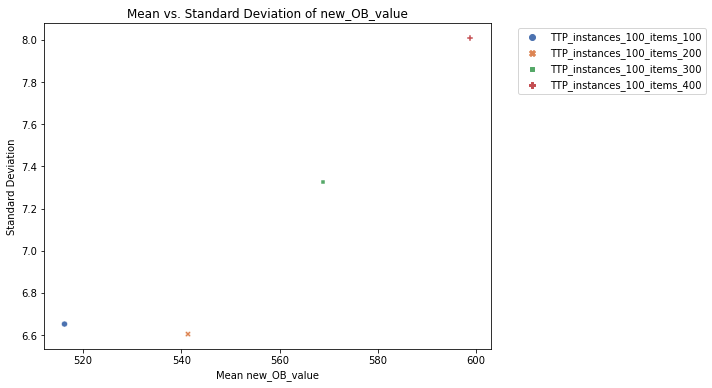

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=descriptive_stats, x='mean', y='std_dev', hue='folder', style='folder', palette='deep')
plt.title('Mean vs. Standard Deviation of new_OB_value')
plt.xlabel('Mean new_OB_value')
plt.ylabel('Standard Deviation')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

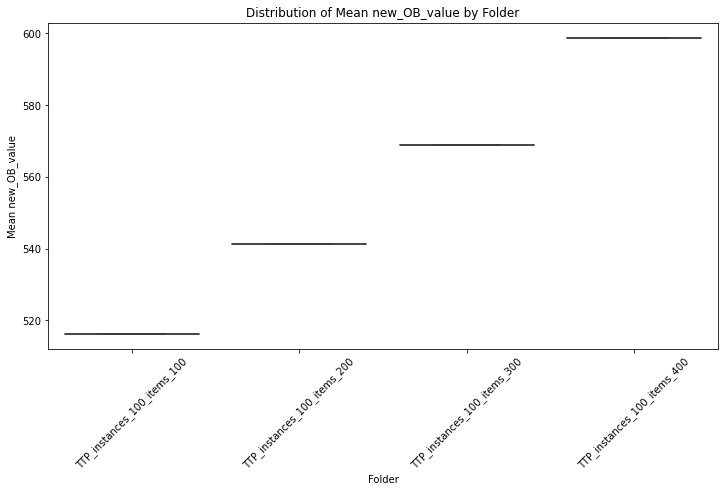

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=descriptive_stats, x='folder', y='mean')
plt.xticks(rotation=45)
plt.title('Distribution of Mean new_OB_value by Folder')
plt.ylabel('Mean new_OB_value')
plt.xlabel('Folder')
plt.show()

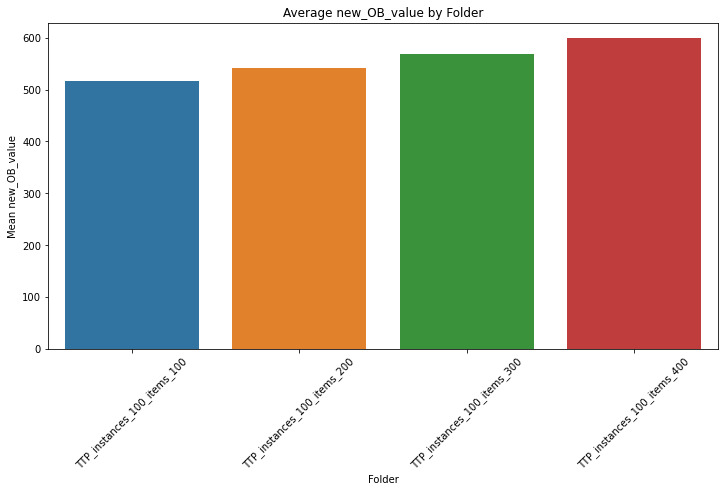

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(data=descriptive_stats, x='folder', y='mean', ci=None)
plt.xticks(rotation=45)
plt.title('Average new_OB_value by Folder')
plt.ylabel('Mean new_OB_value')
plt.xlabel('Folder')
plt.show()

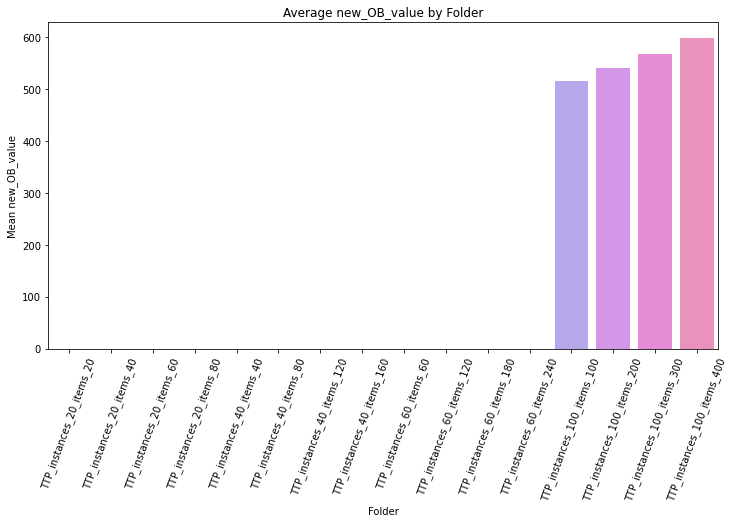

In [57]:
custom_order = ['TTP_instances_20_items_20', 'TTP_instances_20_items_40', 
                'TTP_instances_20_items_60', 'TTP_instances_20_items_80',
                'TTP_instances_40_items_40', 'TTP_instances_40_items_80',
                'TTP_instances_40_items_120', 'TTP_instances_40_items_160',
                'TTP_instances_60_items_60', 'TTP_instances_60_items_120',
                'TTP_instances_60_items_180', 'TTP_instances_60_items_240',
                'TTP_instances_100_items_100', 'TTP_instances_100_items_200', 
                'TTP_instances_100_items_300', 'TTP_instances_100_items_400']

plt.figure(figsize=(12, 6))
sns.barplot(data=descriptive_stats, x='folder', y='mean', ci=None, order=custom_order)
plt.xticks(rotation=70)
plt.title('Average new_OB_value by Folder')
plt.ylabel('Mean new_OB_value')
plt.xlabel('Folder')
plt.show()

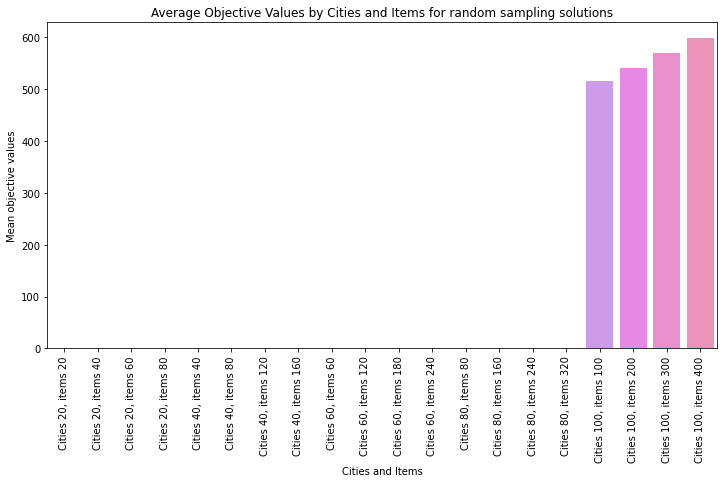

In [58]:
# Create a new column with simplified names (only cities and items)
descriptive_stats['simplified_folder'] = descriptive_stats['folder'].apply(
    lambda x: x.replace('TTP_instances_', 'Cities ').replace('_items_', ', items ')
)

# Custom order for the simplified labels
custom_order_simplified = [
    'Cities 20, items 20', 'Cities 20, items 40', 'Cities 20, items 60', 'Cities 20, items 80',
    'Cities 40, items 40', 'Cities 40, items 80', 'Cities 40, items 120', 'Cities 40, items 160',
    'Cities 60, items 60', 'Cities 60, items 120', 'Cities 60, items 180', 'Cities 60, items 240',
    'Cities 80, items 80', 'Cities 80, items 160', 'Cities 80, items 240', 'Cities 80, items 320',
    'Cities 100, items 100', 'Cities 100, items 200', 'Cities 100, items 300', 'Cities 100, items 400'
]

plt.figure(figsize=(12, 6))
sns.barplot(data=descriptive_stats, x='simplified_folder', y='mean', ci=None, order=custom_order_simplified)
plt.xticks(rotation=90)
plt.title('Average Objective Values by Cities and Items for random sampling solutions')
plt.ylabel('Mean objective values')
plt.xlabel('Cities and Items')
plt.show()

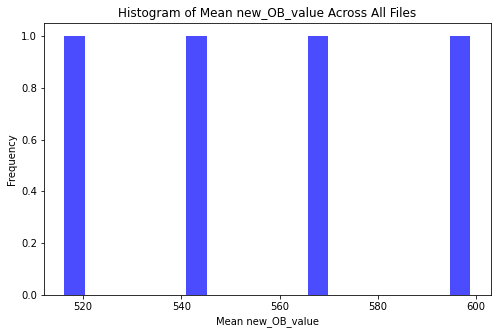

In [59]:
all_means = descriptive_stats['mean'].dropna()

plt.figure(figsize=(8, 5))
plt.hist(all_means, bins=20, alpha=0.7, color='blue')
plt.title('Histogram of Mean new_OB_value Across All Files')
plt.xlabel('Mean new_OB_value')
plt.ylabel('Frequency')
plt.show()

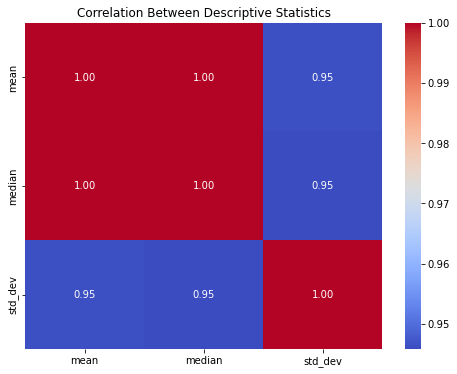

In [60]:
corr_matrix = descriptive_stats[['mean', 'median', 'std_dev']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Descriptive Statistics')
plt.show()

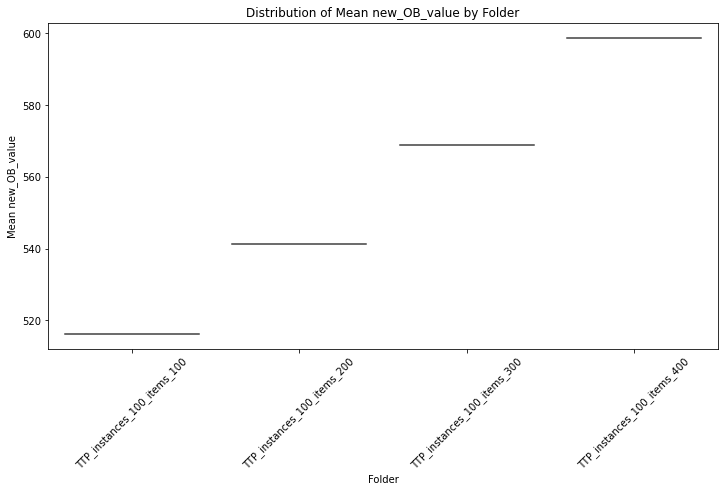

In [61]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=descriptive_stats, x='folder', y='mean', inner='quartile')
plt.xticks(rotation=45)
plt.title('Distribution of Mean new_OB_value by Folder')
plt.ylabel('Mean new_OB_value')
plt.xlabel('Folder')
plt.show()

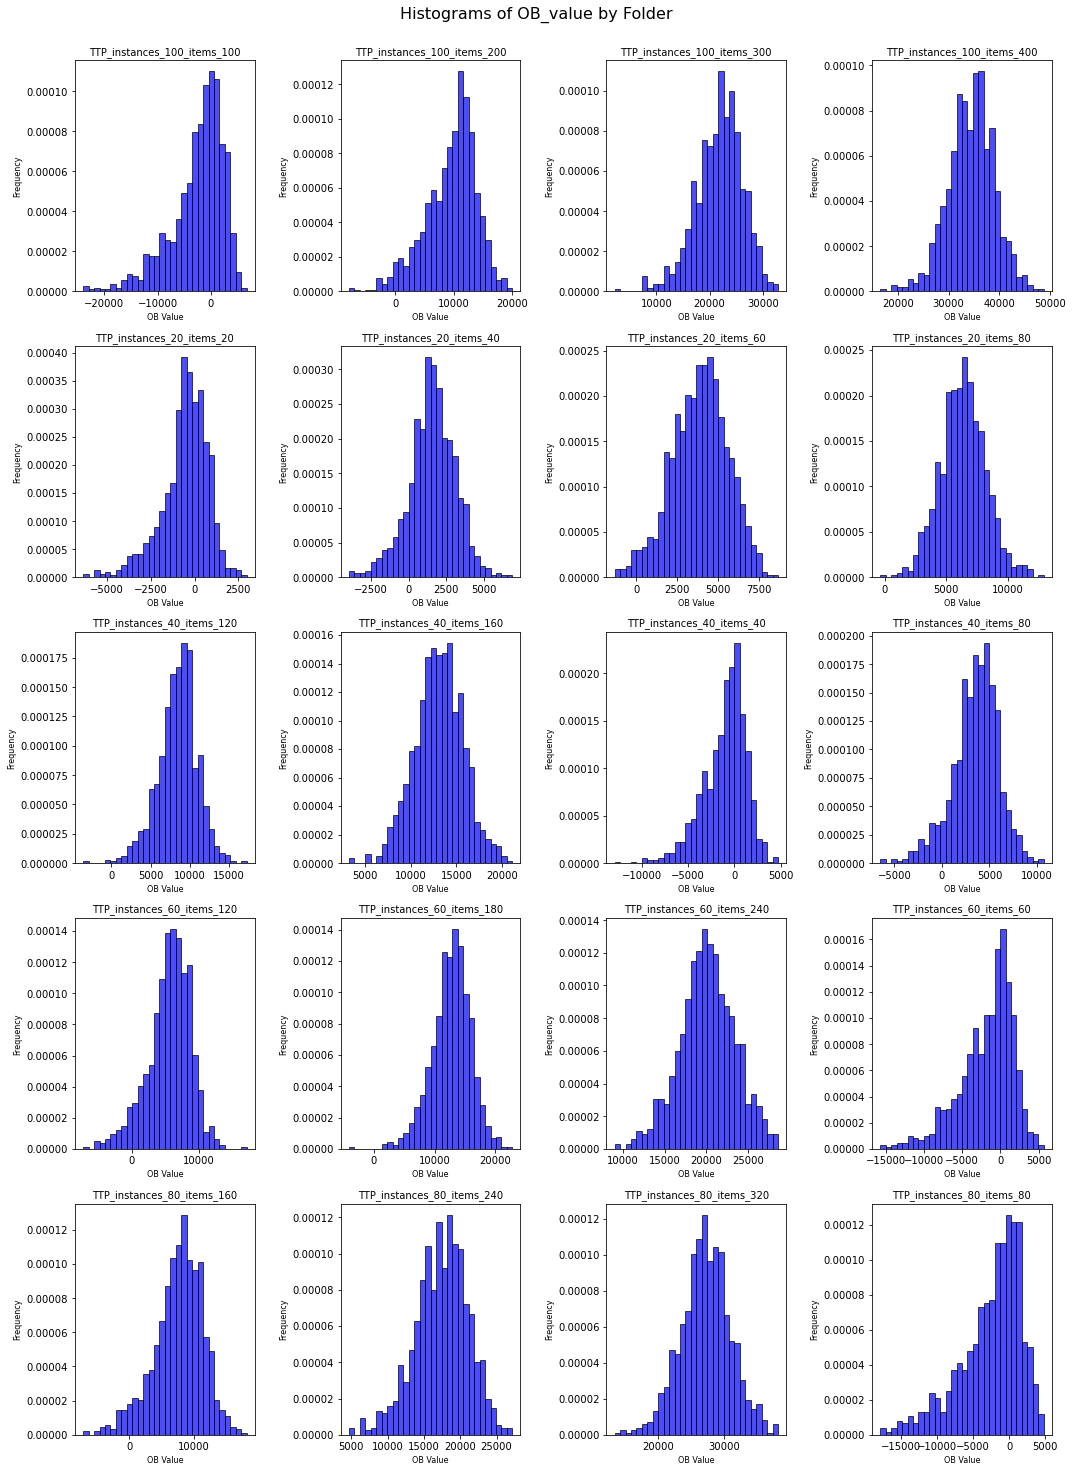

In [62]:
def get_histograms_by_folder(json_folder, value, bins=20):
    folder_ob_values = {}  # Dictionary to store OB values by folder

    # Iterate through subfolders
    for subfolder in os.listdir(json_folder):
        subfolder_path = os.path.join(json_folder, subfolder)

        if os.path.isdir(subfolder_path):  # Only process directories
            folder_ob_values[subfolder] = []  # Initialize list for this folder

            for json_file in os.listdir(subfolder_path):
                json_file_path = os.path.join(subfolder_path, json_file)

                if json_file.endswith('.json'):
                    try:
                        # Load the JSON file
                        with open(json_file_path, 'r') as file:
                            data = json.load(file)

                        # Extract `value` from each entry in the JSON file
                        ob_values = [entry[value] for entry in data if value in entry]
                        folder_ob_values[subfolder].extend(ob_values)  # Add to folder's OB values

                    except Exception as e:
                        print(f"Error processing {json_file_path}: {e}")

    # Plot histograms for each folder
    num_folders = len(folder_ob_values)
    cols = 4  # Number of columns in the subplot grid
    rows = (num_folders + cols - 1) // cols  # Calculate number of rows

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4), sharey=False)
    axes = axes.flatten()

    for i, (folder, ob_values) in enumerate(folder_ob_values.items()):
        axes[i].hist(ob_values, bins=bins, color='blue', edgecolor='black', alpha=0.7, density=True)
        axes[i].set_title(folder, fontsize=10)
        axes[i].set_xlabel('OB Value', fontsize=8)
        axes[i].set_ylabel('Frequency', fontsize=8)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.suptitle(f'Histograms of {value} by Folder', fontsize=16, y=1.02)
    plt.show()

# Example usage
json_folder = "random_results"  # Replace with the actual folder path
value_to_analyze = "OB_value"  # Replace with the key to analyze
get_histograms_by_folder(json_folder, value_to_analyze, bins=30)

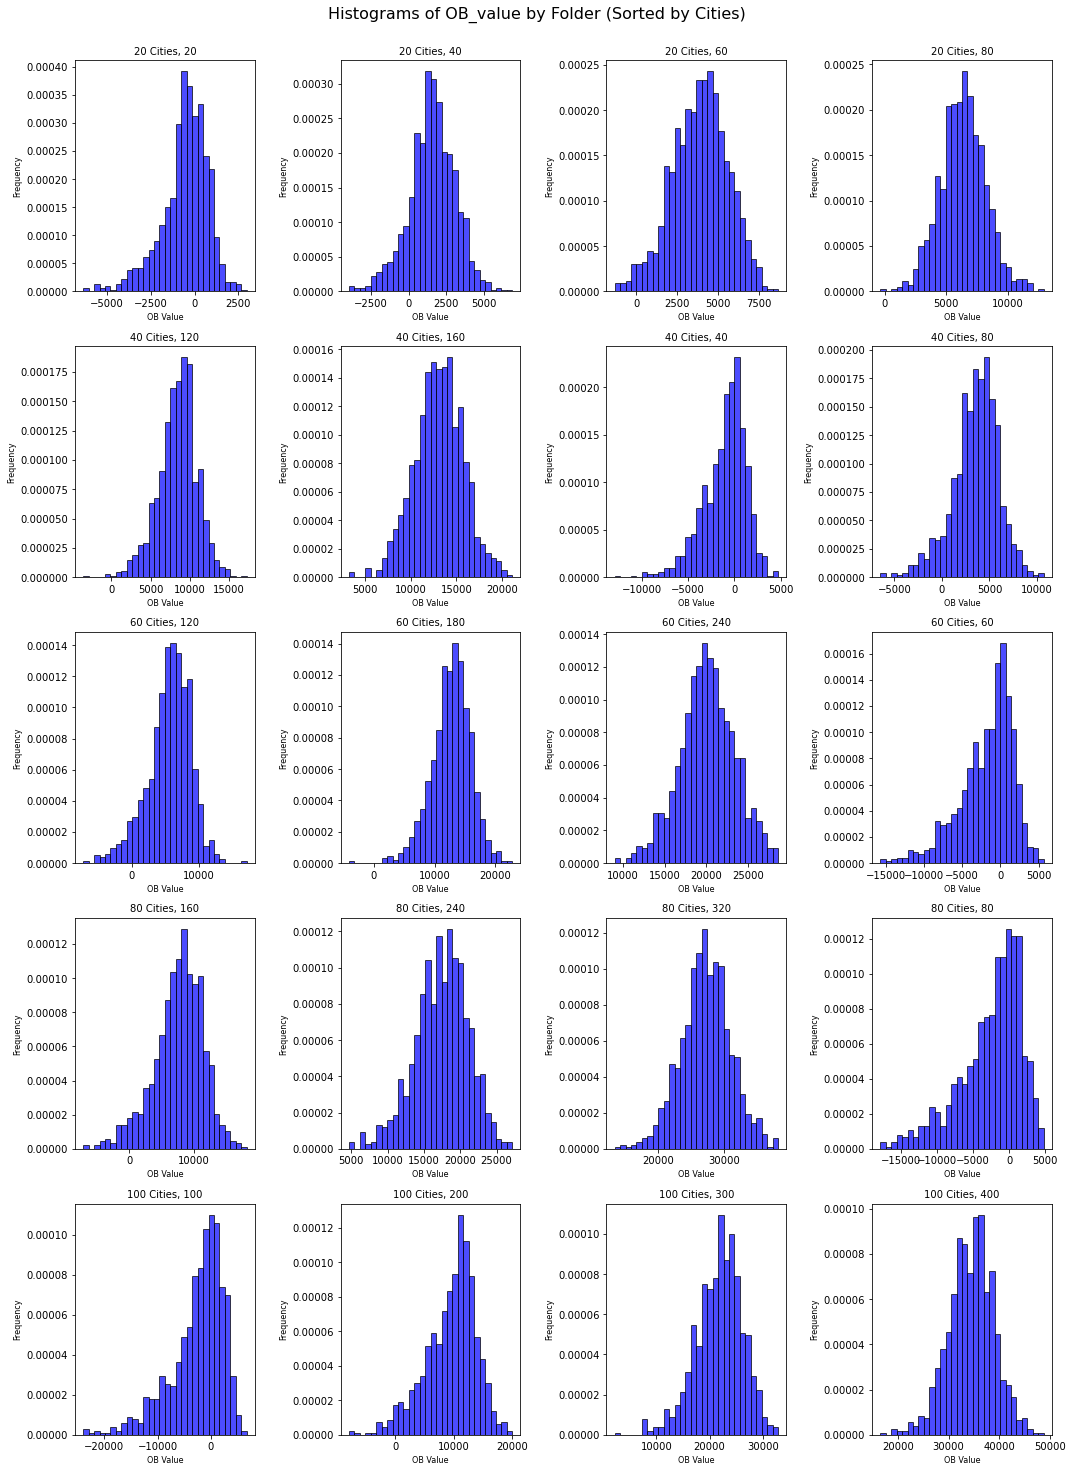

In [63]:

def get_histograms_by_folder_sorted(json_folder, value, bins=20):
    folder_ob_values = {}  # Dictionary to store OB values by folder

    # Iterate through subfolders
    for subfolder in os.listdir(json_folder):
        subfolder_path = os.path.join(json_folder, subfolder)

        if os.path.isdir(subfolder_path):  # Only process directories
            folder_ob_values[subfolder] = []  # Initialize list for this folder

            for json_file in os.listdir(subfolder_path):
                json_file_path = os.path.join(subfolder_path, json_file)

                if json_file.endswith('.json'):
                    try:
                        # Load the JSON file
                        with open(json_file_path, 'r') as file:
                            data = json.load(file)

                        # Extract `value` from each entry in the JSON file
                        ob_values = [entry[value] for entry in data if value in entry]
                        folder_ob_values[subfolder].extend(ob_values)  # Add to folder's OB values

                    except Exception as e:
                        print(f"Error processing {json_file_path}: {e}")

    # Extract the number of cities from folder names and sort
    sorted_folders = sorted(folder_ob_values.keys(), key=lambda x: int(x.split('_')[2]))  # Assuming folder name format "TTP_instances_<cities>_items_<items>"

    # Plot histograms for each folder
    num_folders = len(folder_ob_values)
    cols = 4  # Number of columns in the subplot grid
    rows = (num_folders + cols - 1) // cols  # Calculate number of rows

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4), sharey=False)
    axes = axes.flatten()

    for i, folder in enumerate(sorted_folders):
        ob_values = folder_ob_values[folder]
        axes[i].hist(ob_values, bins=bins, color='blue', edgecolor='black', alpha=0.7,density=True)
        axes[i].set_title(folder.replace('TTP_instances_', '').replace('_items_', ' Cities, '), fontsize=10)
        axes[i].set_xlabel('OB Value', fontsize=8)
        axes[i].set_ylabel('Frequency', fontsize=8)

    # Hide unused subplots
    for j in range(len(sorted_folders), len(axes)):
        axes[j].axis('off')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.suptitle(f'Histograms of {value} by Folder (Sorted by Cities)', fontsize=16, y=1.02)
    plt.show()

# Example usage
json_folder = "random_results"  # Replace with the actual folder path
value_to_analyze = "OB_value"  # Replace with the key to analyze
get_histograms_by_folder_sorted(json_folder, value_to_analyze, bins=30)

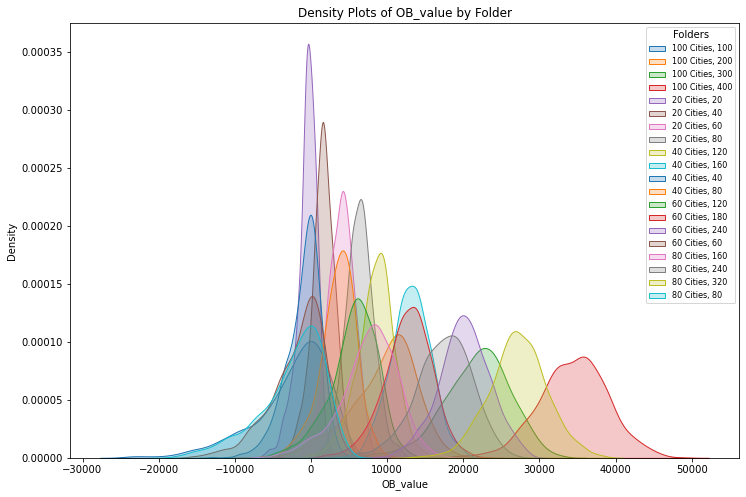

In [64]:
def plot_density_by_folder(json_folder, value):
    folder_ob_values = {}

    # Collect OB values by folder
    for subfolder in os.listdir(json_folder):
        subfolder_path = os.path.join(json_folder, subfolder)

        if os.path.isdir(subfolder_path):  # Only process directories
            folder_ob_values[subfolder] = []  # Initialize list for this folder

            for json_file in os.listdir(subfolder_path):
                json_file_path = os.path.join(subfolder_path, json_file)

                if json_file.endswith('.json'):
                    try:
                        # Load the JSON file
                        with open(json_file_path, 'r') as file:
                            data = json.load(file)

                        # Extract values
                        ob_values = [entry[value] for entry in data if value in entry]
                        folder_ob_values[subfolder].extend(ob_values)

                    except Exception as e:
                        print(f"Error processing {json_file_path}: {e}")

    # Plot density plots
    plt.figure(figsize=(12, 8))
    for folder, ob_values in folder_ob_values.items():
        sns.kdeplot(ob_values, label=folder.replace('TTP_instances_', '').replace('_items_', ' Cities, '), shade=True)

    plt.title(f'Density Plots of {value} by Folder')
    plt.xlabel(value)
    plt.ylabel('Density')
    plt.legend(title="Folders", loc='upper right', fontsize=8)
    plt.show()

# Example usage
json_folder = "random_results"  # Replace with the actual folder path
value_to_analyze = "OB_value"  # Replace with the key to analyze
plot_density_by_folder(json_folder, value_to_analyze)

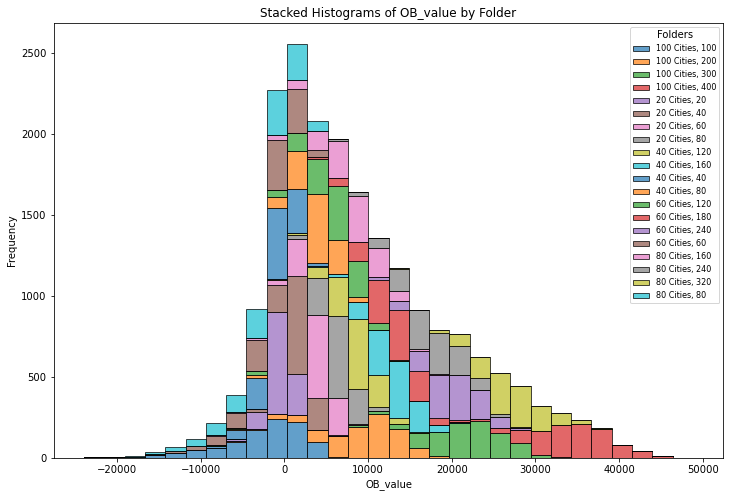

In [65]:
def plot_stacked_histograms(json_folder, value, bins=50):
    folder_ob_values = {}

    # Collect OB values by folder
    for subfolder in os.listdir(json_folder):
        subfolder_path = os.path.join(json_folder, subfolder)

        if os.path.isdir(subfolder_path):  # Only process directories
            folder_ob_values[subfolder] = []  # Initialize list for this folder

            for json_file in os.listdir(subfolder_path):
                json_file_path = os.path.join(subfolder_path, json_file)

                if json_file.endswith('.json'):
                    try:
                        # Load the JSON file
                        with open(json_file_path, 'r') as file:
                            data = json.load(file)

                        # Extract values
                        ob_values = [entry[value] for entry in data if value in entry]
                        folder_ob_values[subfolder].extend(ob_values)

                    except Exception as e:
                        print(f"Error processing {json_file_path}: {e}")

    # Prepare data for stacked histogram
    labels = [folder.replace('TTP_instances_', '').replace('_items_', ' Cities, ') for folder in folder_ob_values.keys()]
    data = list(folder_ob_values.values())

    # Plot stacked histogram
    plt.figure(figsize=(12, 8))
    plt.hist(data, bins=bins, stacked=True, label=labels, alpha=0.7, edgecolor='black')
    plt.title(f'Stacked Histograms of {value} by Folder')
    plt.xlabel(value)
    plt.ylabel('Frequency')
    plt.legend(title="Folders", loc='upper right', fontsize=8)
    plt.show()

# Example usage
json_folder = "random_results"  # Replace with the actual folder path
value_to_analyze = "OB_value"  # Replace with the key to analyze
plot_stacked_histograms(json_folder, value_to_analyze, bins=30)

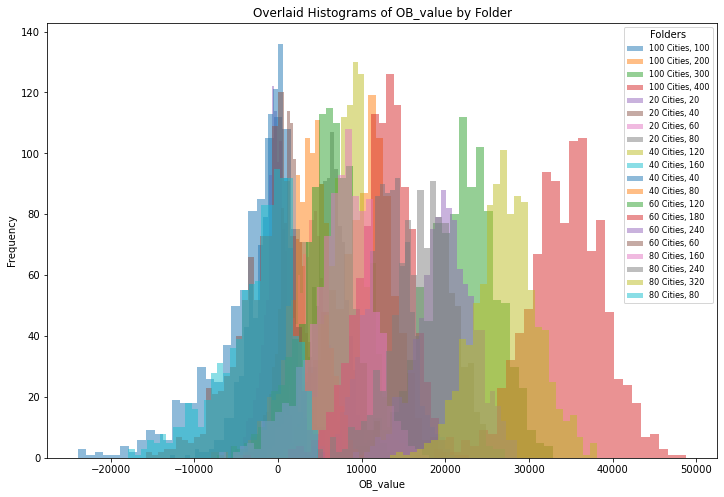

In [66]:
def plot_overlaid_histograms(json_folder, value, bins=50):
    folder_ob_values = {}

    # Collect OB values by folder
    for subfolder in os.listdir(json_folder):
        subfolder_path = os.path.join(json_folder, subfolder)

        if os.path.isdir(subfolder_path):  # Only process directories
            folder_ob_values[subfolder] = []  # Initialize list for this folder

            for json_file in os.listdir(subfolder_path):
                json_file_path = os.path.join(subfolder_path, json_file)

                if json_file.endswith('.json'):
                    try:
                        # Load the JSON file
                        with open(json_file_path, 'r') as file:
                            data = json.load(file)

                        # Extract values
                        ob_values = [entry[value] for entry in data if value in entry]
                        folder_ob_values[subfolder].extend(ob_values)

                    except Exception as e:
                        print(f"Error processing {json_file_path}: {e}")

    # Plot overlaid histograms
    plt.figure(figsize=(12, 8))
    for folder, ob_values in folder_ob_values.items():
        plt.hist(ob_values, bins=bins, alpha=0.5, label=folder.replace('TTP_instances_', '').replace('_items_', ' Cities, '))

    plt.title(f'Overlaid Histograms of {value} by Folder')
    plt.xlabel(value)
    plt.ylabel('Frequency')
    plt.legend(title="Folders", loc='upper right', fontsize=8)
    plt.show()

# Example usage
json_folder = "random_results"  # Replace with the actual folder path
value_to_analyze = "OB_value"  # Replace with the key to analyze
plot_overlaid_histograms(json_folder, value_to_analyze, bins=30)

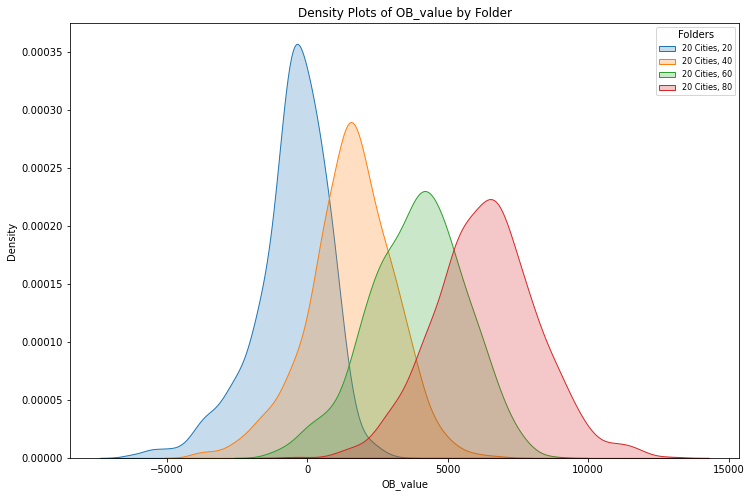

In [67]:
def plot_density_by_folder(json_folder, value, selected_subfolders=None):
    folder_ob_values = {}

    # Collect OB values by folder
    for subfolder in os.listdir(json_folder):
        subfolder_path = os.path.join(json_folder, subfolder)

        # Only process directories
        if os.path.isdir(subfolder_path):
            # Skip subfolders not in the selected list (if provided)
            if selected_subfolders and subfolder not in selected_subfolders:
                continue

            folder_ob_values[subfolder] = []  # Initialize list for this folder

            for json_file in os.listdir(subfolder_path):
                json_file_path = os.path.join(subfolder_path, json_file)

                if json_file.endswith('.json'):
                    try:
                        # Load the JSON file
                        with open(json_file_path, 'r') as file:
                            data = json.load(file)

                        # Extract values
                        ob_values = [entry[value] for entry in data if value in entry]
                        folder_ob_values[subfolder].extend(ob_values)

                    except Exception as e:
                        print(f"Error processing {json_file_path}: {e}")

    # Plot density plots
    plt.figure(figsize=(12, 8))
    for folder, ob_values in folder_ob_values.items():
        sns.kdeplot(ob_values, label=folder.replace('TTP_instances_', '').replace('_items_', ' Cities, '), shade=True)

    plt.title(f'Density Plots of {value} by Folder')
    plt.xlabel(value)
    plt.ylabel('Density')
    plt.legend(title="Folders", loc='upper right', fontsize=8)
    plt.show()

# Example usage
json_folder = "random_results"  # Replace with the actual folder path
value_to_analyze = "OB_value"  # Replace with the key to analyze

# Select specific subfolders to process
selected_subfolders = ["TTP_instances_20_items_20","TTP_instances_20_items_40","TTP_instances_20_items_60","TTP_instances_20_items_80" ]
plot_density_by_folder(json_folder, value_to_analyze, selected_subfolders)

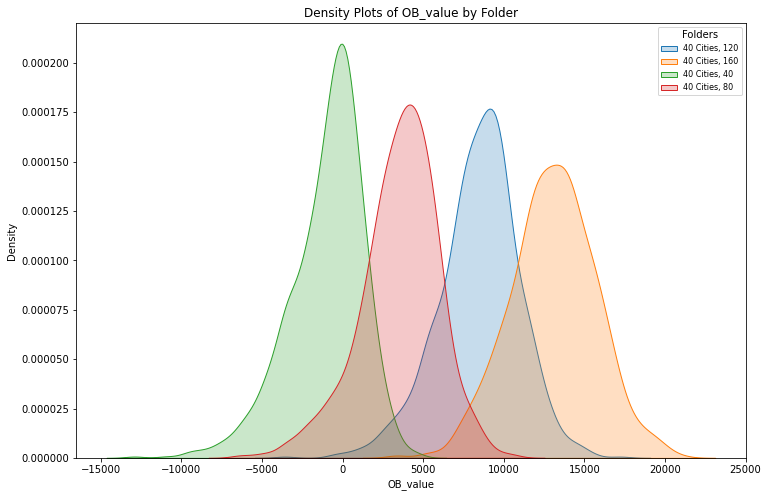

In [68]:
json_folder = "random_results"  # Replace with the actual folder path
value_to_analyze = "OB_value"  # Replace with the key to analyze

# Select specific subfolders to process
selected_subfolders = ["TTP_instances_40_items_40","TTP_instances_40_items_80","TTP_instances_40_items_120","TTP_instances_40_items_160" ]
plot_density_by_folder(json_folder, value_to_analyze, selected_subfolders)

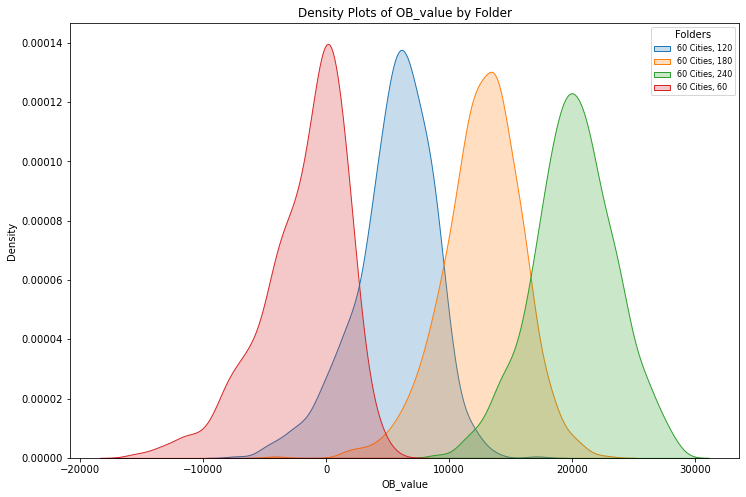

In [69]:
json_folder = "random_results"  # Replace with the actual folder path
value_to_analyze = "OB_value"  # Replace with the key to analyze

# Select specific subfolders to process
selected_subfolders = ["TTP_instances_60_items_60","TTP_instances_60_items_120","TTP_instances_60_items_180","TTP_instances_60_items_240" ]
plot_density_by_folder(json_folder, value_to_analyze, selected_subfolders)

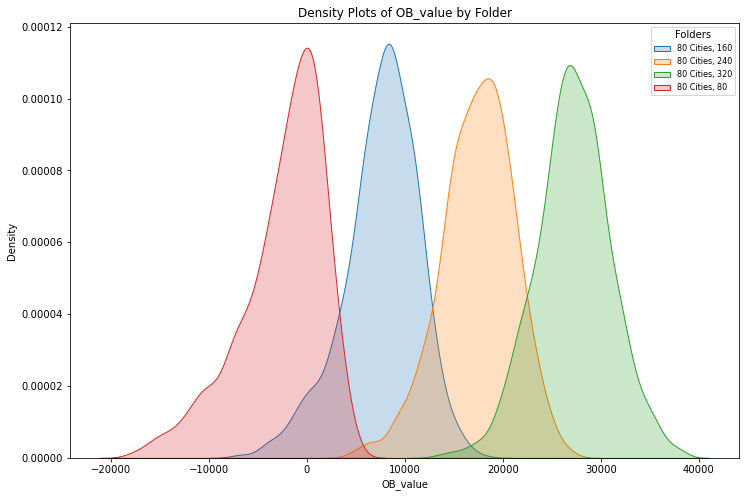

In [70]:
json_folder = "random_results"  # Replace with the actual folder path
value_to_analyze = "OB_value"  # Replace with the key to analyze

# Select specific subfolders to process
selected_subfolders = ["TTP_instances_80_items_80","TTP_instances_80_items_160","TTP_instances_80_items_240","TTP_instances_80_items_320" ]
plot_density_by_folder(json_folder, value_to_analyze, selected_subfolders)

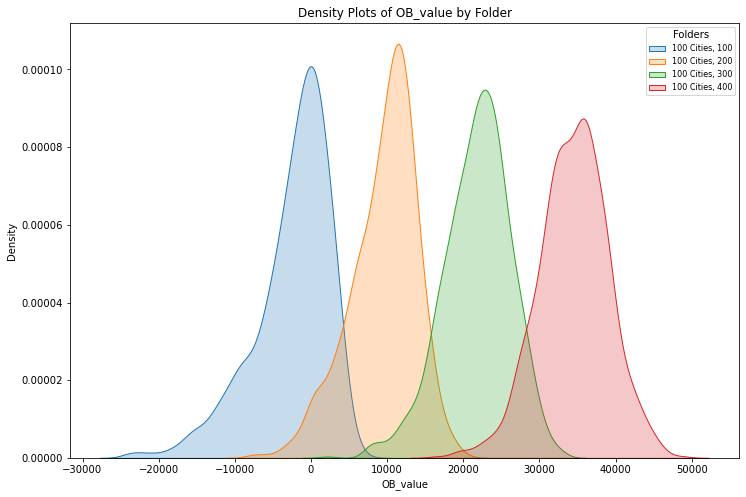

In [71]:
json_folder = "random_results"  # Replace with the actual folder path
value_to_analyze = "OB_value"  # Replace with the key to analyze

# Select specific subfolders to process
selected_subfolders = ["TTP_instances_100_items_100","TTP_instances_100_items_200","TTP_instances_100_items_300","TTP_instances_100_items_400" ]
plot_density_by_folder(json_folder, value_to_analyze, selected_subfolders)

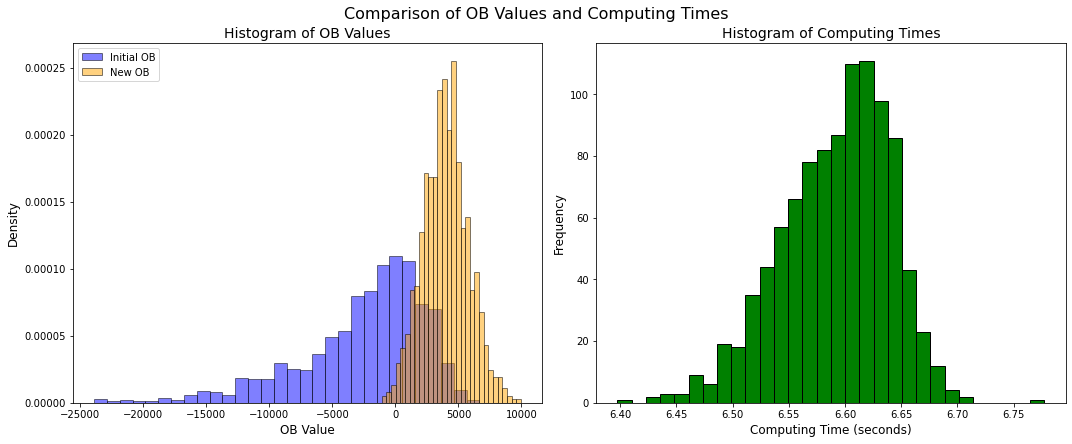

In [72]:
def plot_histograms_comparing_by_results(json_folder, bins=50):
    """
    Process a folder of JSON files containing 'initial_OB_value', 'new_OB_value',
    and 'computing_time', then plot histograms comparing the values.
    """
    all_results = []

    # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder):
        json_file_path = os.path.join(json_folder, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results:
        print("No valid data found in the folder.")
        return

    # Extract values for plotting
    initial_ob_values = [result['initial_OB_value'] for result in all_results if 'initial_OB_value' in result]
    new_ob_values = [result['new_OB_value'] for result in all_results if 'new_OB_value' in result]
    computing_times = [result['computing_time'] for result in all_results if 'computing_time' in result]

    # Plot histograms
    plt.figure(figsize=(15, 6))

    # Histogram of OB Values
    plt.subplot(1, 2, 1)
    plt.hist(initial_ob_values, bins=bins, alpha=0.5, label='Initial OB', color='blue', edgecolor='black', density=True)
    plt.hist(new_ob_values, bins=bins, alpha=0.5, label='New OB', color='orange', edgecolor='black', density=True)
    plt.title('Histogram of OB Values', fontsize=14)
    plt.xlabel('OB Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=10)

    # Histogram of Computing Times
    plt.subplot(1, 2, 2)
    plt.hist(computing_times, bins=bins, color='green', edgecolor='black')
    plt.title('Histogram of Computing Times', fontsize=14)
    plt.xlabel('Computing Time (seconds)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.suptitle('Comparison of OB Values and Computing Times', fontsize=16, y=1.02)
    plt.show()

# Example usage
json_folder = "SA_hybride_results_3rd/TTP_instances_100_items_100"  # Replace with the folder containing JSON files
plot_histograms_comparing_by_results(json_folder, bins=30)

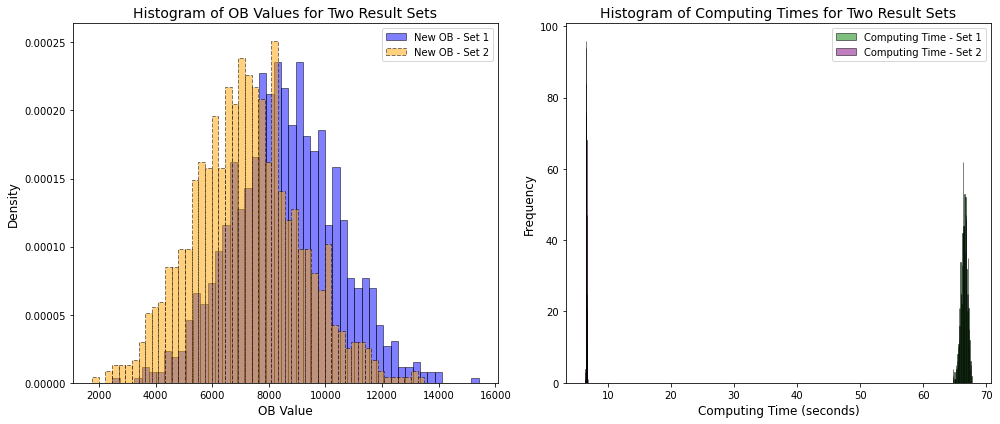

In [73]:
def plot_histograms_comparing_two(json_file1, json_file2):
    # Load data from the first JSON file
    try:
        with open(json_file1, 'r') as file:
            results1 = json.load(file)
    except Exception as e:
        print(f"Error loading {json_file1}: {e}")
        return

    # Load data from the second JSON file
    try:
        with open(json_file2, 'r') as file:
            results2 = json.load(file)
    except Exception as e:
        print(f"Error loading {json_file2}: {e}")
        return
    # Extract values from the first results set
    new_ob_values1 = [result['new_OB_value'] for result in results1 if 'new_OB_value' in result]
    computing_times1 = [result['computing_time'] for result in results1 if 'computing_time' in result]

    # Extract values from the second results set
    new_ob_values2 = [result['new_OB_value'] for result in results2 if 'new_OB_value' in result]
    computing_times2 = [result['computing_time'] for result in results2 if 'computing_time' in result]

    # Create figure for histograms
    plt.figure(figsize=(14, 6))

    # Plot OB values for both result sets in the first subplot
    plt.subplot(1, 2, 1)
    plt.hist(new_ob_values1, bins=50, alpha=0.5, label='New OB - Set 1', edgecolor='black', color='blue', density=True)
    plt.hist(new_ob_values2, bins=50, alpha=0.5, label='New OB - Set 2', edgecolor='black', color='orange', linestyle='dashed', density=True)
    plt.title('Histogram of OB Values for Two Result Sets', fontsize=14)
    plt.xlabel('OB Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=10)

    # Plot computing times for both result sets in the second subplot
    plt.subplot(1, 2, 2)
    plt.hist(computing_times1, bins=50, alpha=0.5, edgecolor='black', label='Computing Time - Set 1', color='green')
    plt.hist(computing_times2, bins=50, alpha=0.5, edgecolor='black', label='Computing Time - Set 2', color='purple')
    plt.title('Histogram of Computing Times for Two Result Sets', fontsize=14)
    plt.xlabel('Computing Time (seconds)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(fontsize=10)

    # Adjust layout
    plt.tight_layout()

    # Save or display the plot
    #if output_filename:
    #    plt.savefig(output_filename, format='png', bbox_inches='tight')
    #    print(f"Plot saved to {output_filename}")
    #else:
    plt.show()
        
plot_histograms_comparing_two("SA_hybride_results/TTP_instances_100_items_100/results_SA_tsp_cities_100_items_100.json", "SA_hybride_results_1st_version/TTP_instances_100_items_100/results_SA_tsp_cities_100_items_100.json")

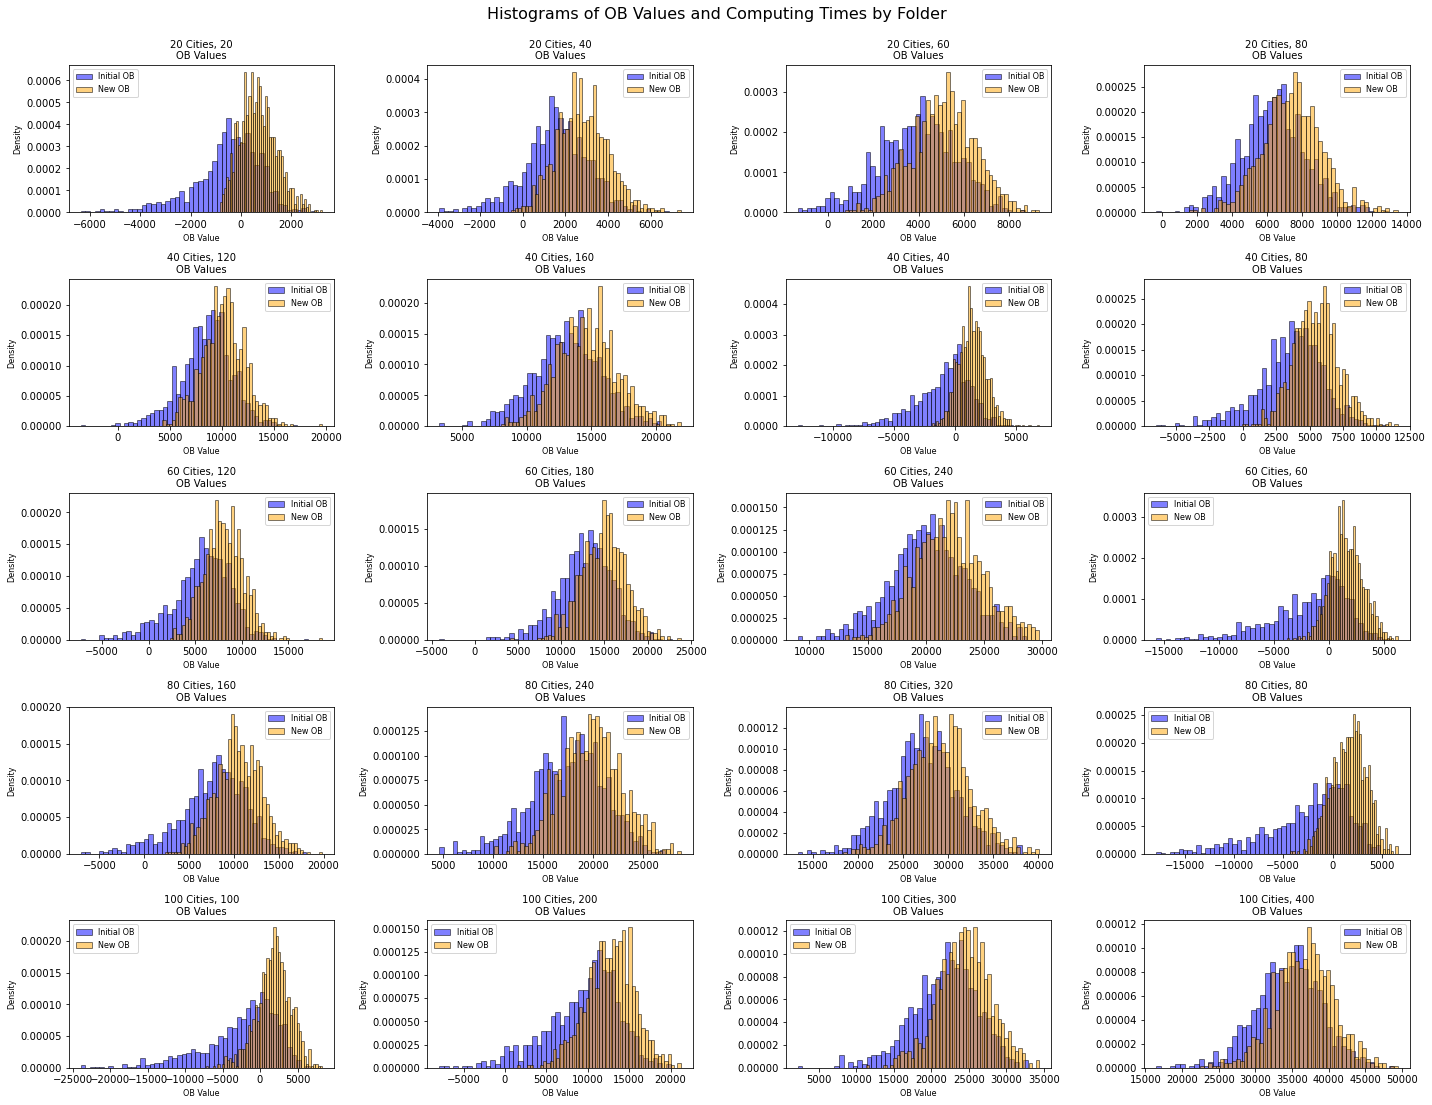

In [74]:
import os
import json
import matplotlib.pyplot as plt

def plot_histograms_comparing_by_folder(json_folder, bins=50):
    # Dictionary to store initial and new OB values and computing times by folder
    folder_results = {}

    # Iterate through subfolders
    for subfolder in os.listdir(json_folder):
        subfolder_path = os.path.join(json_folder, subfolder)

        if os.path.isdir(subfolder_path):  # Only process directories
            folder_results[subfolder] = {'initial_OB': [], 'new_OB': [], 'computing_times': []}

            for json_file in os.listdir(subfolder_path):
                json_file_path = os.path.join(subfolder_path, json_file)

                if json_file.endswith('.json'):
                    try:
                        # Load the JSON file
                        with open(json_file_path, 'r') as file:
                            data = json.load(file)

                        # Extract the required values
                        folder_results[subfolder]['initial_OB'].extend([entry['initial_OB_value'] for entry in data if 'initial_OB_value' in entry])
                        folder_results[subfolder]['new_OB'].extend([entry['new_OB_value'] for entry in data if 'new_OB_value' in entry])
                        folder_results[subfolder]['computing_times'].extend([entry['computing_time'] for entry in data if 'computing_time' in entry])

                    except Exception as e:
                        print(f"Error processing {json_file_path}: {e}")

    # Extract the number of cities from folder names and sort
    sorted_folders = sorted(folder_results.keys(), key=lambda x: int(x.split('_')[2]))  # Assuming folder name format "TTP_instances_<cities>_items_<items>"

    # Plot histograms for each folder
    num_folders = len(folder_results)
    cols = 4 # Number of columns in the subplot grid
    rows = (num_folders + cols - 1) // cols#(num_folders * 2 + cols - 1) // cols  # Adjust for two histograms per folder

    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3), sharey=False)
    axes = axes.flatten()

    subplot_index = 0
    for folder in sorted_folders:
        results = folder_results[folder]
        
        # Histogram for initial and new OB values
        axes[subplot_index].hist(results['initial_OB'], bins=bins, alpha=0.5, label='Initial OB', color='blue', edgecolor='black', density=True)
        axes[subplot_index].hist(results['new_OB'], bins=bins, alpha=0.5, label='New OB', color='orange', edgecolor='black', density=True)
        axes[subplot_index].set_title(f"{folder.replace('TTP_instances_', '').replace('_items_', ' Cities, ')}\nOB Values", fontsize=10)
        axes[subplot_index].set_xlabel('OB Value', fontsize=8)
        axes[subplot_index].set_ylabel('Density', fontsize=8)
        axes[subplot_index].legend(fontsize=8)
        subplot_index += 1

        # Histogram for computing times
      #  axes[subplot_index].hist(results['computing_times'], bins=bins, color='green', edgecolor='black')
      #  axes[subplot_index].set_title(f"{folder.replace('TTP_instances_', '').replace('_items_', ' Cities, ')}\nComputing Times", fontsize=10)
      #  axes[subplot_index].set_xlabel('Computing Time (seconds)', fontsize=8)
      #  axes[subplot_index].set_ylabel('Frequency', fontsize=8)
      #  subplot_index += 1

    # Hide unused subplots
    for j in range(subplot_index, len(axes)):
        axes[j].axis('off')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.suptitle('Histograms of OB Values and Computing Times by Folder', fontsize=16, y=1.02)
    plt.show()

# Example usage
json_folder = "hillclimber_hybride_results_2nd_version"  # Replace with the actual folder path
plot_histograms_comparing_by_folder(json_folder, bins=50)


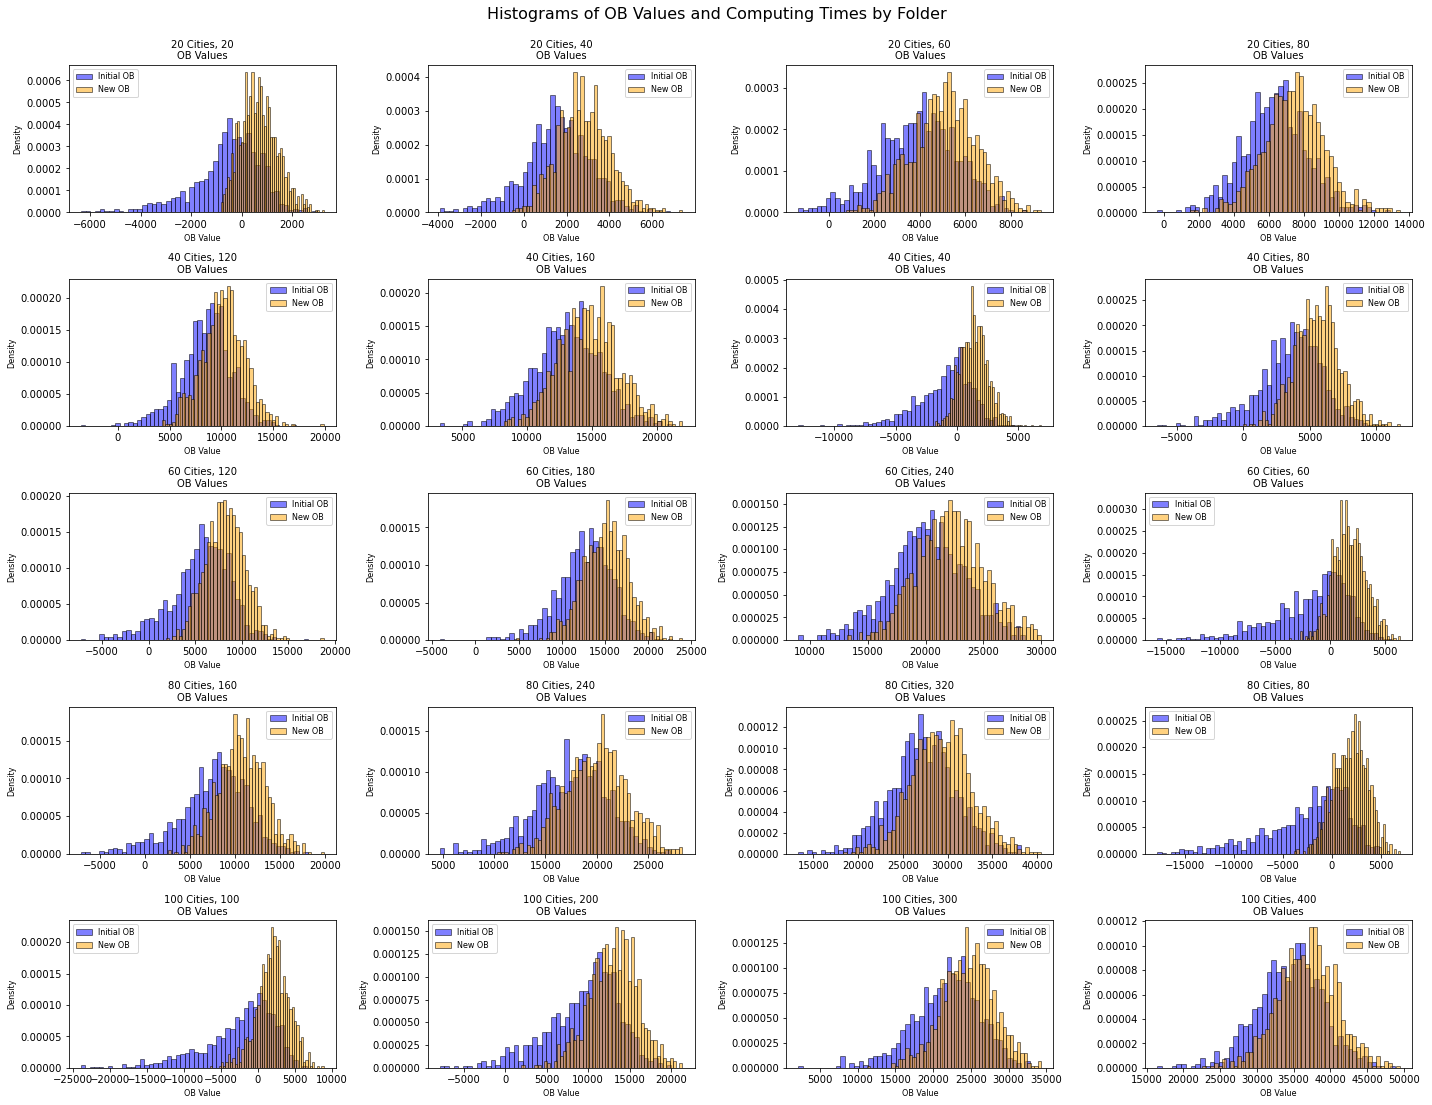

In [75]:
json_folder = "hillclimber_hybride_results_3rd"  # Replace with the actual folder path
plot_histograms_comparing_by_folder(json_folder, bins=50)

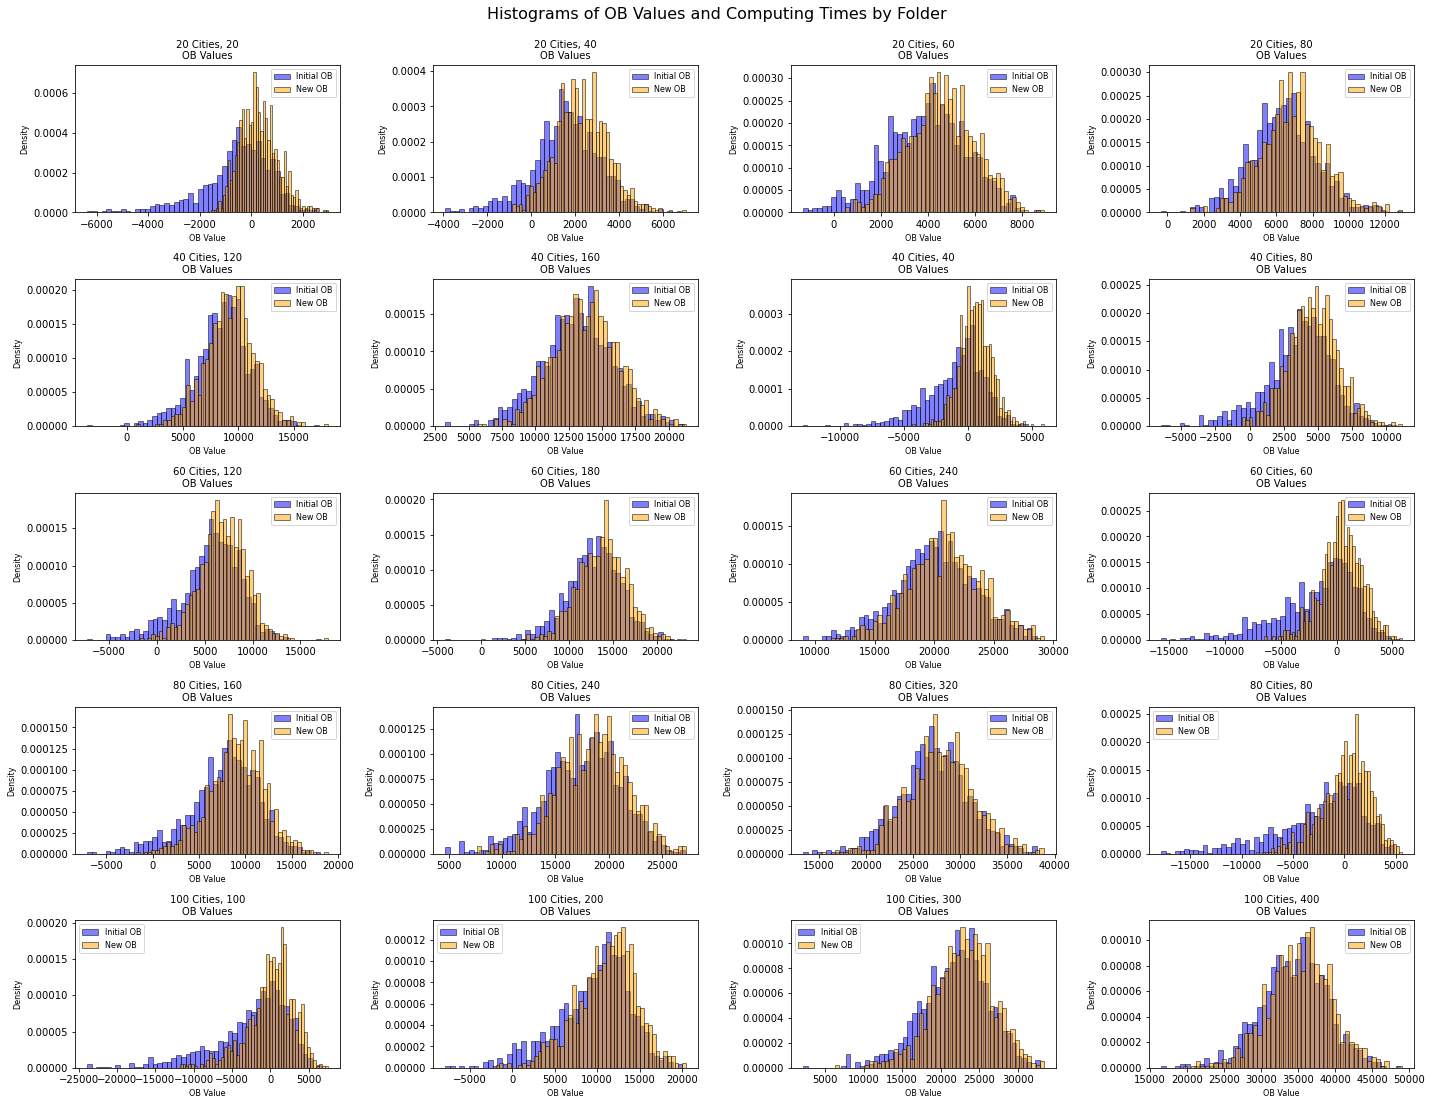

In [76]:
json_folder = "hillclimber_KP_results_2nd_version"  # Replace with the actual folder path
plot_histograms_comparing_by_folder(json_folder, bins=50)

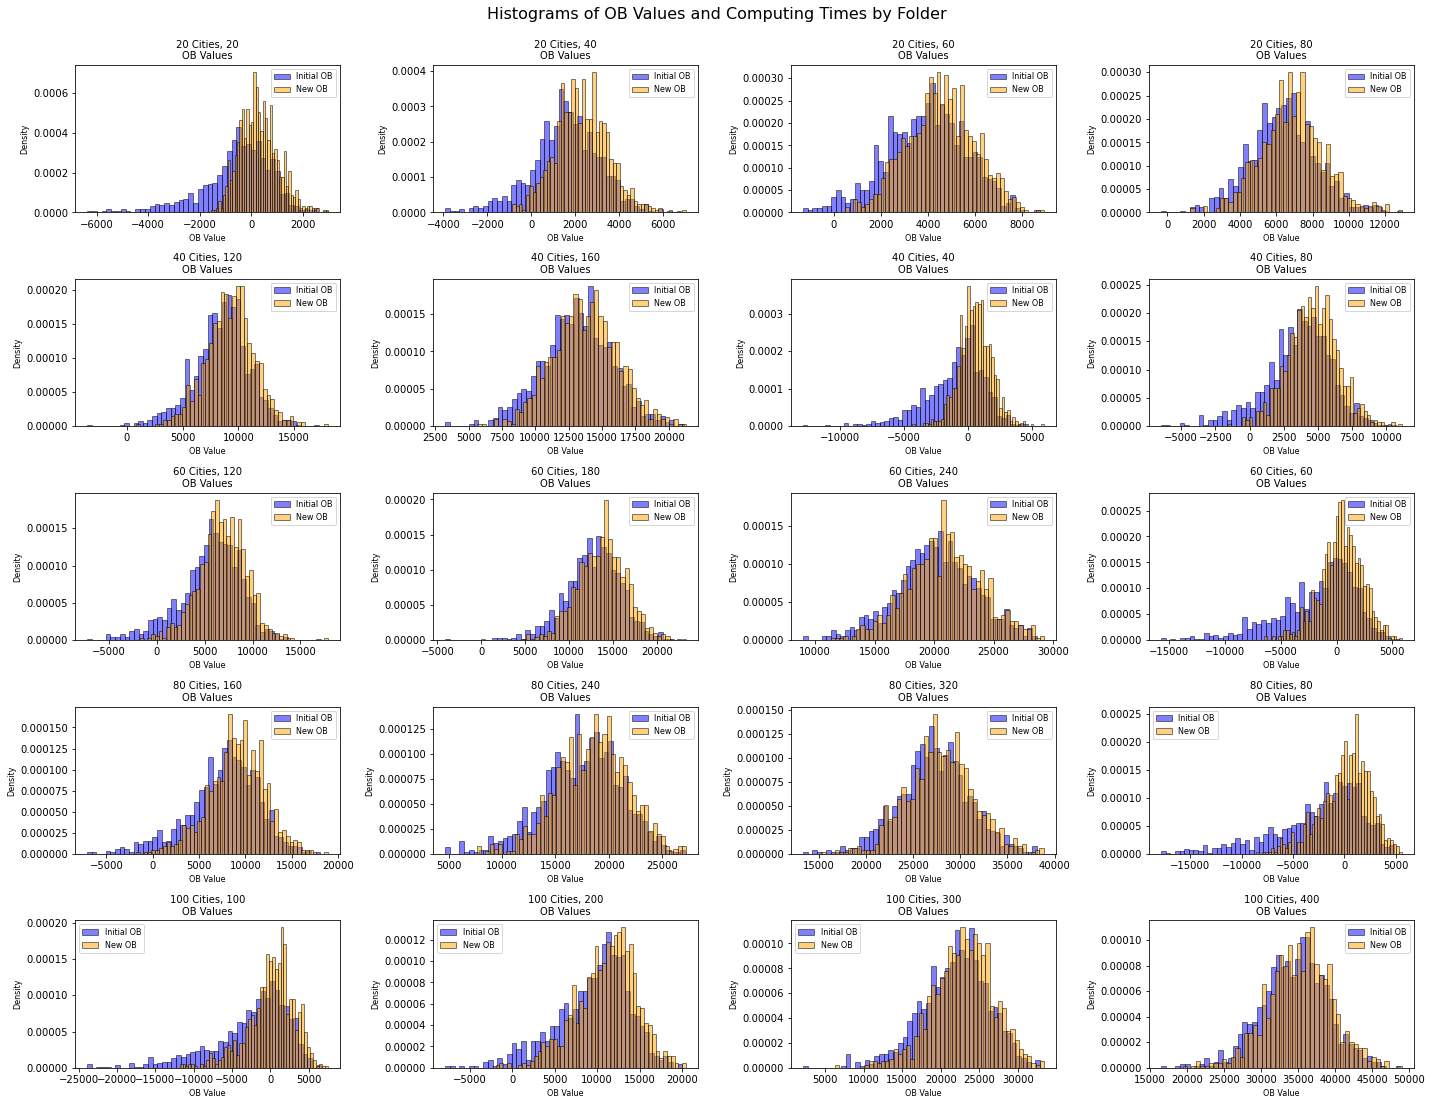

In [77]:
json_folder = "hillclimber_KP_results_3rd"  # Replace with the actual folder path
plot_histograms_comparing_by_folder(json_folder, bins=50)

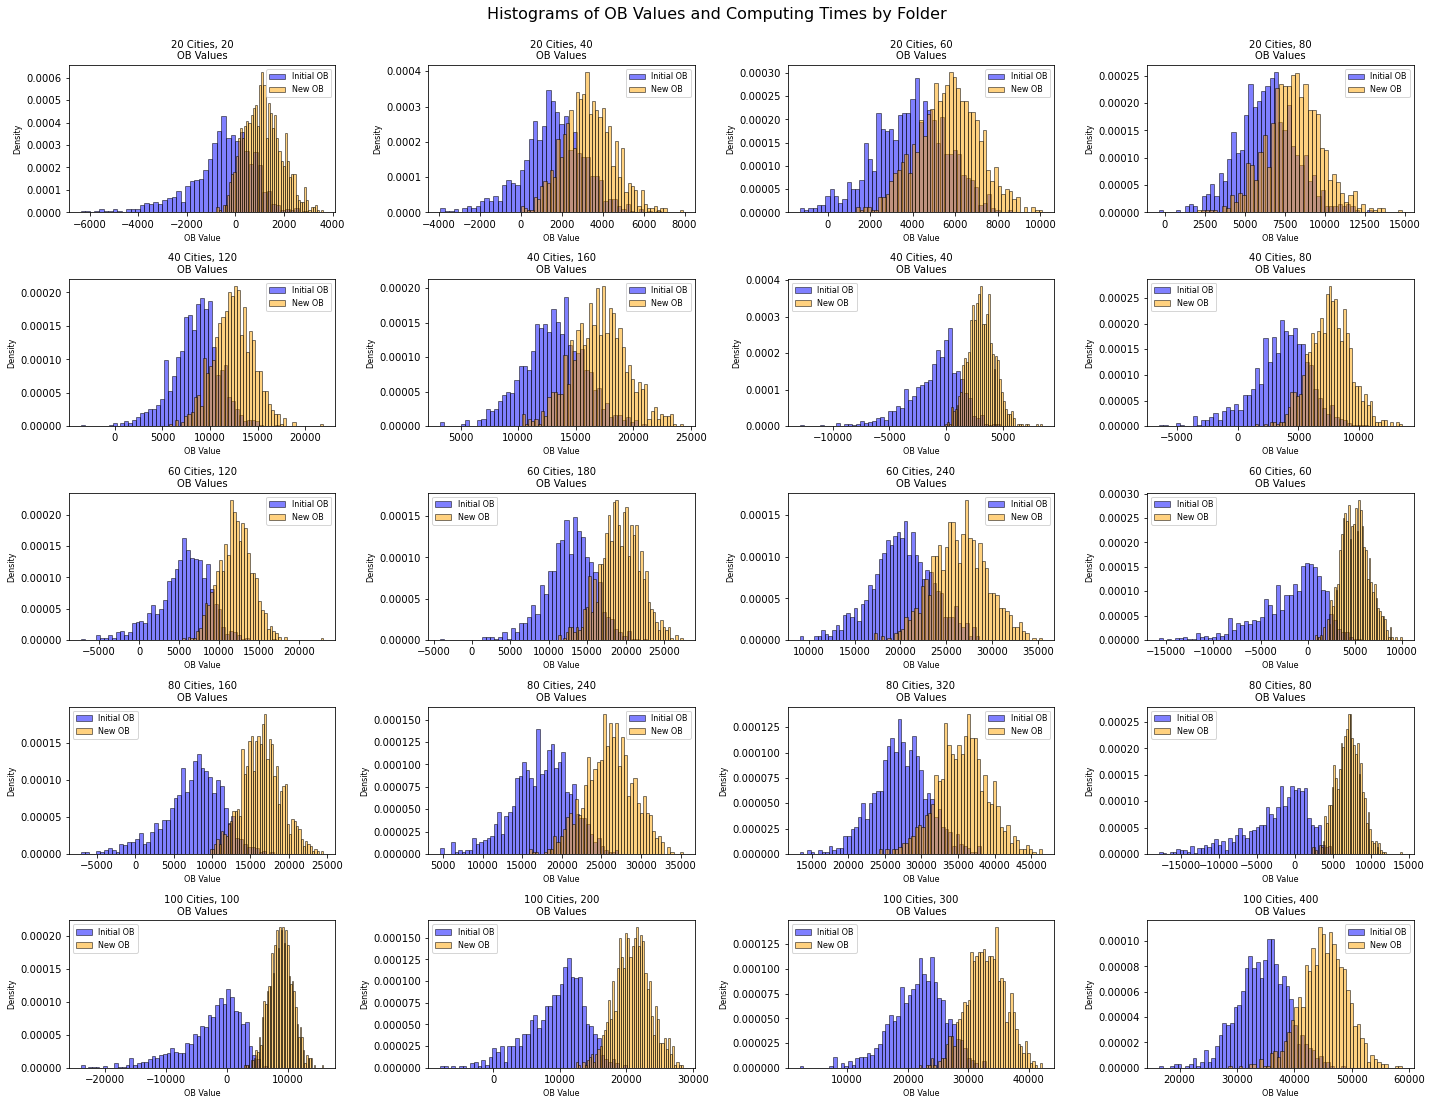

In [78]:
json_folder = "hillclimber_tsp_swapping_results_2nd_version"  # Replace with the actual folder path
plot_histograms_comparing_by_folder(json_folder, bins=50)

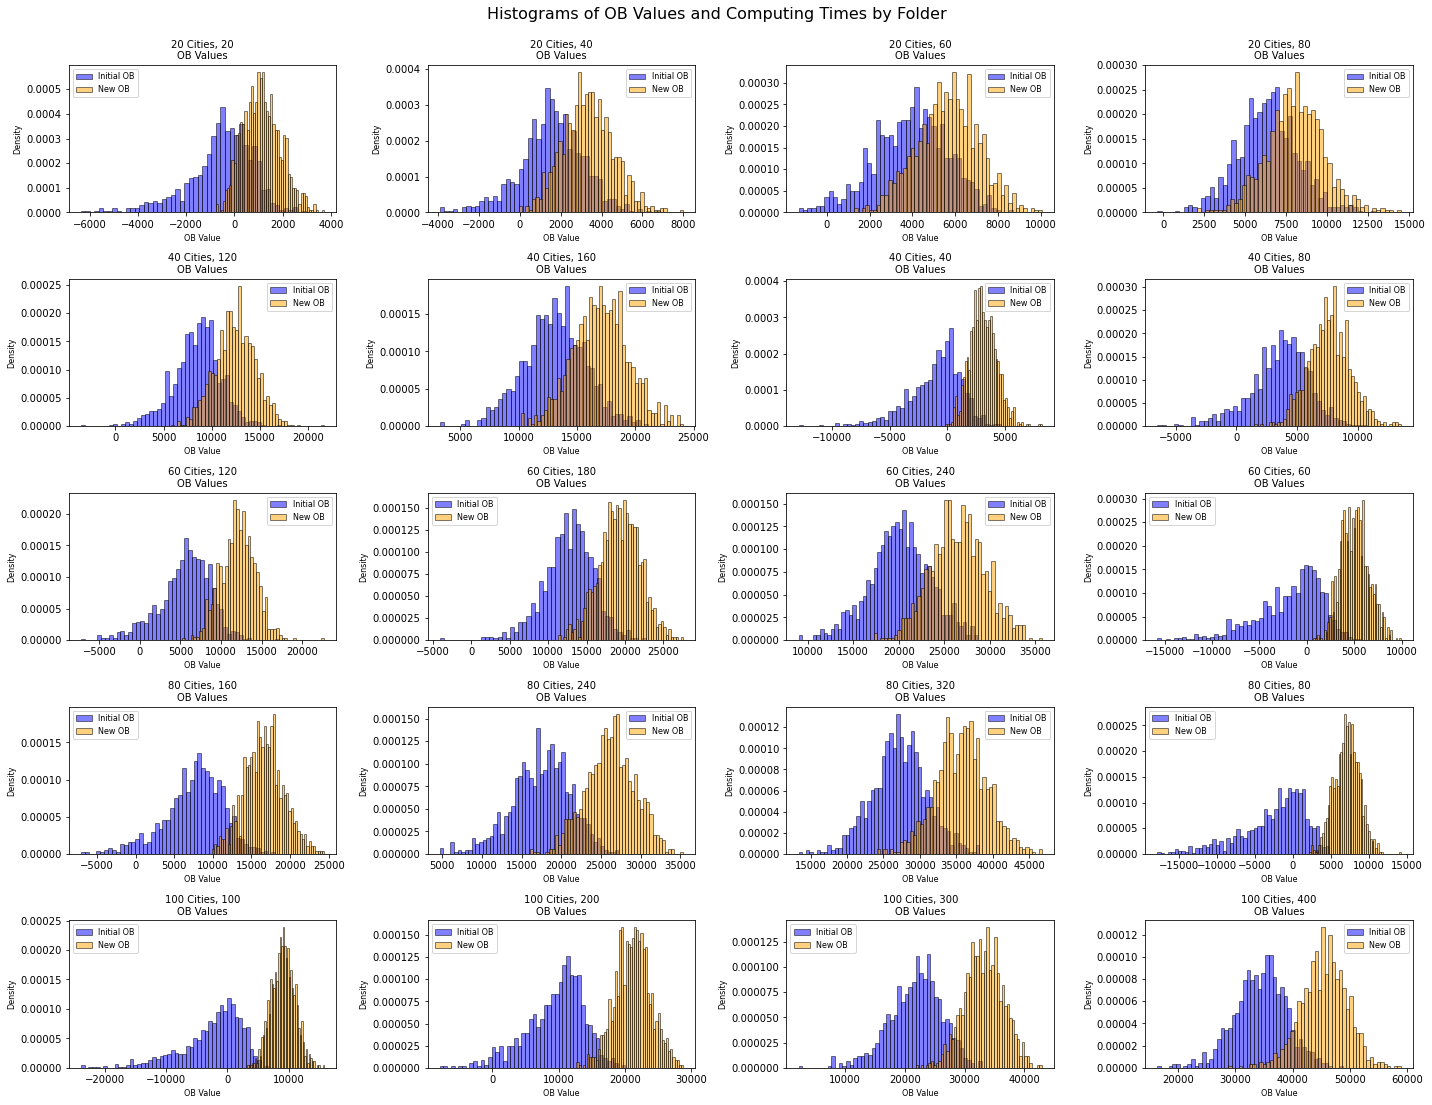

In [79]:
json_folder = "hillclimber_tsp_swapping_results_3rd"  # Replace with the actual folder path
plot_histograms_comparing_by_folder(json_folder, bins=50)

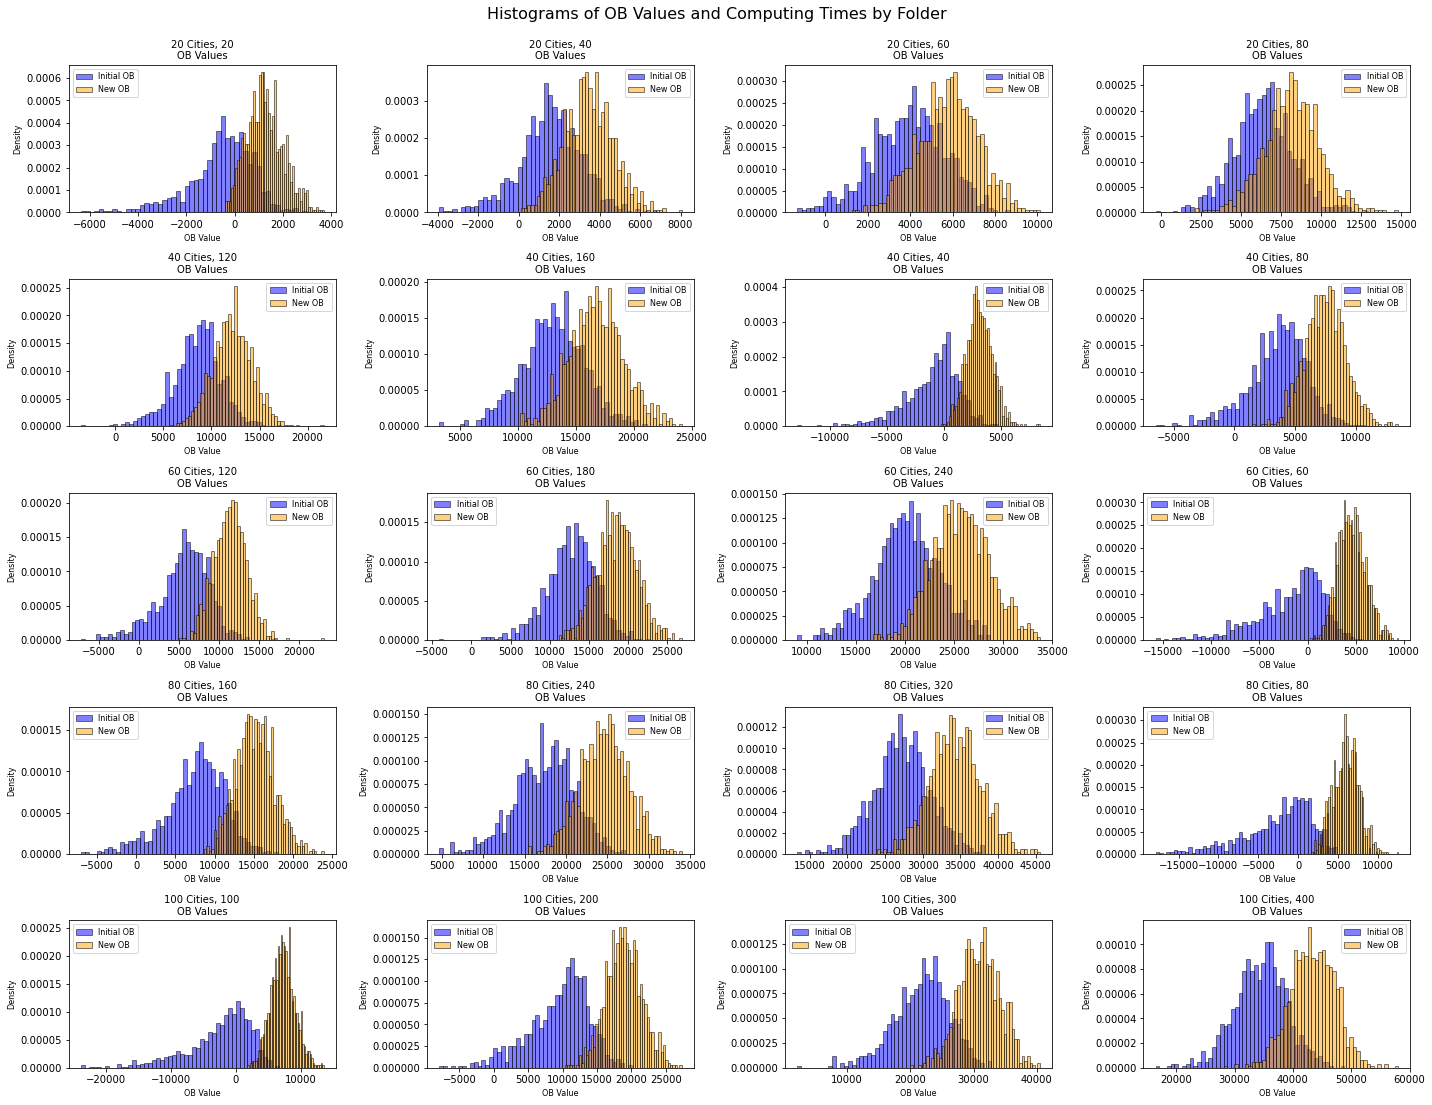

In [80]:
json_folder = "SA_hybride_results_1st_version"  # Replace with the actual folder path
plot_histograms_comparing_by_folder(json_folder, bins=50)

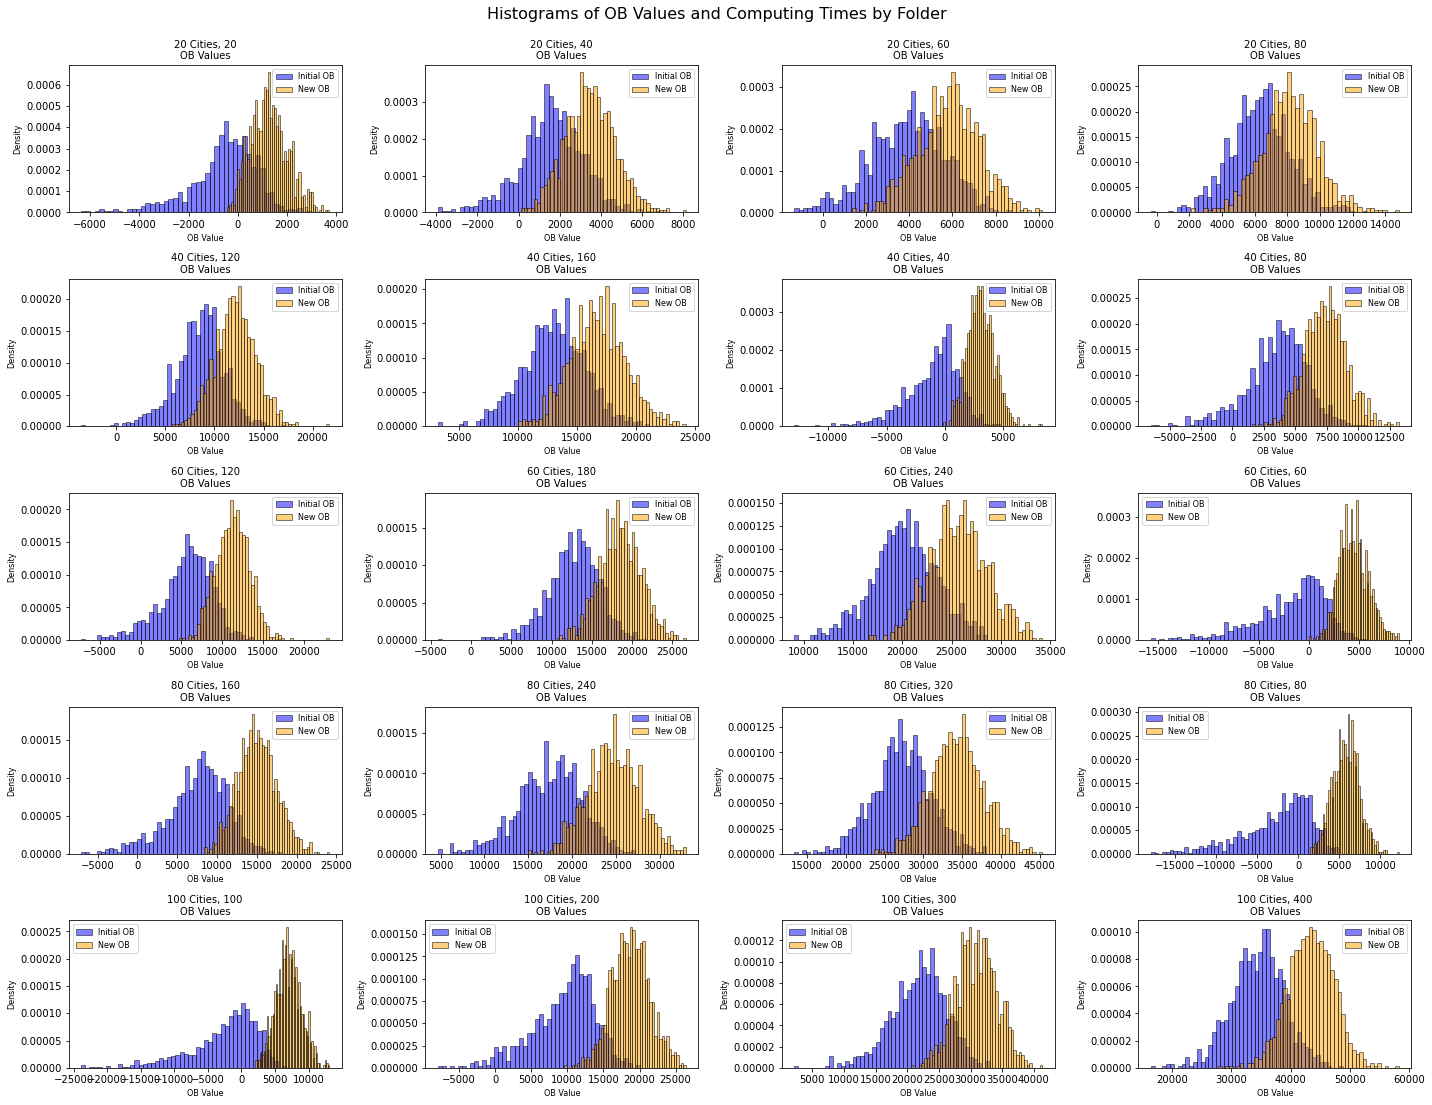

In [81]:
json_folder = "SA_hybride_results_2nd_version"  # Replace with the actual folder path
plot_histograms_comparing_by_folder(json_folder, bins=50)

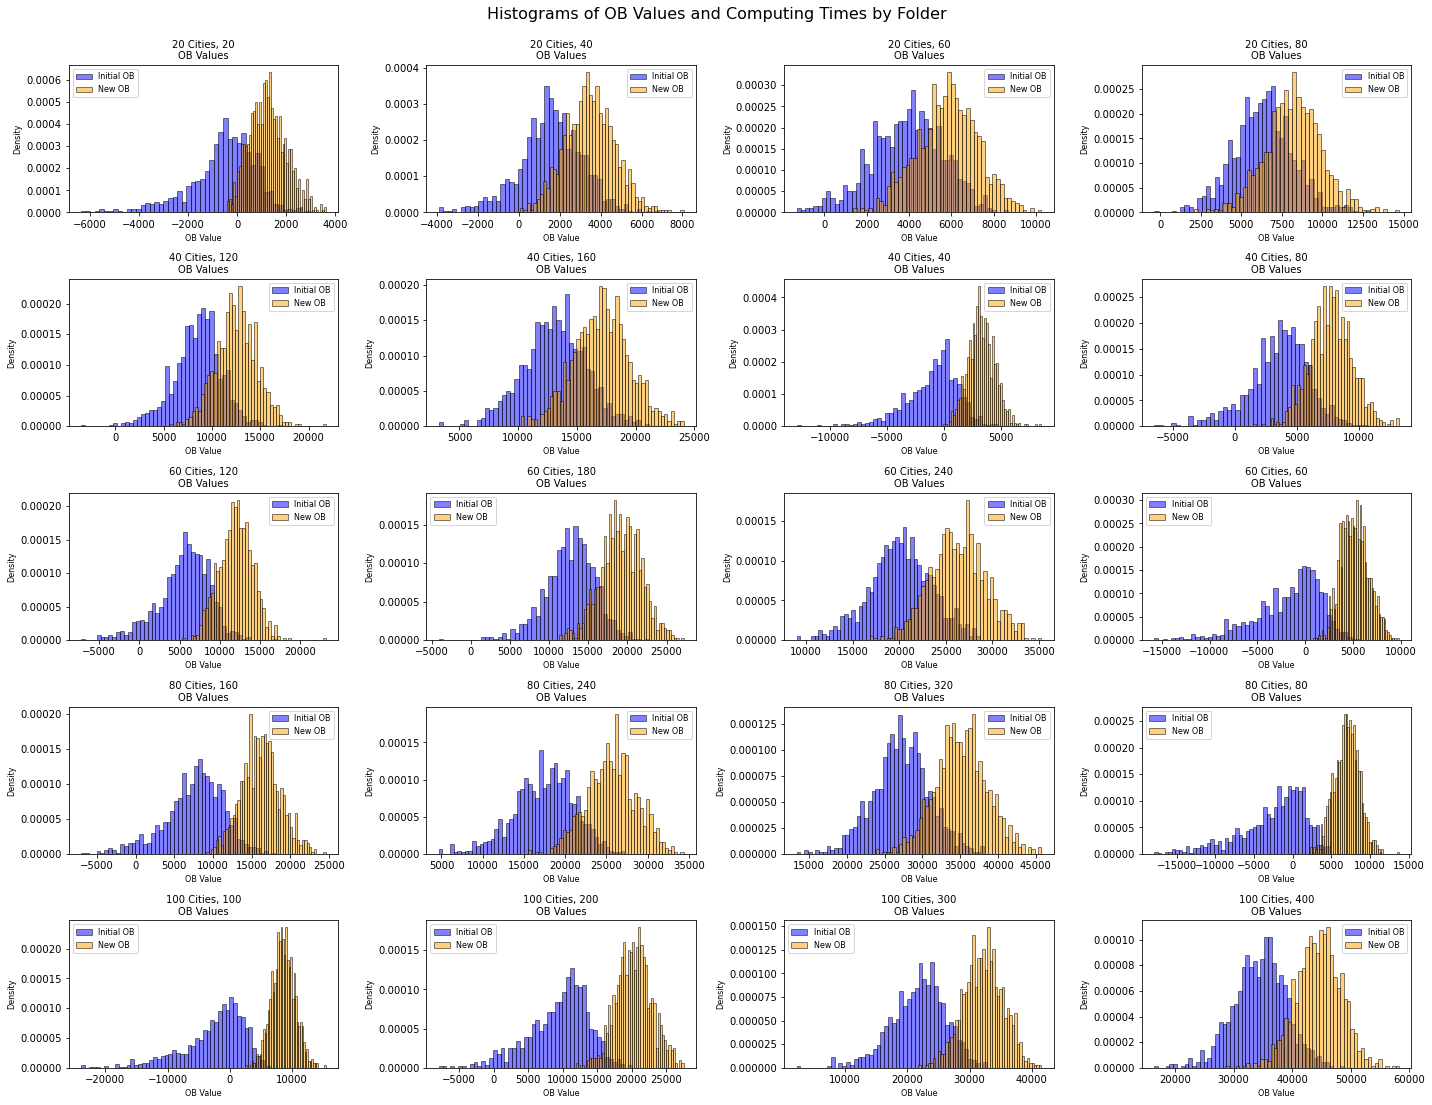

In [82]:
json_folder = "SA_hybride_results"  # Replace with the actual folder path
plot_histograms_comparing_by_folder(json_folder, bins=50)

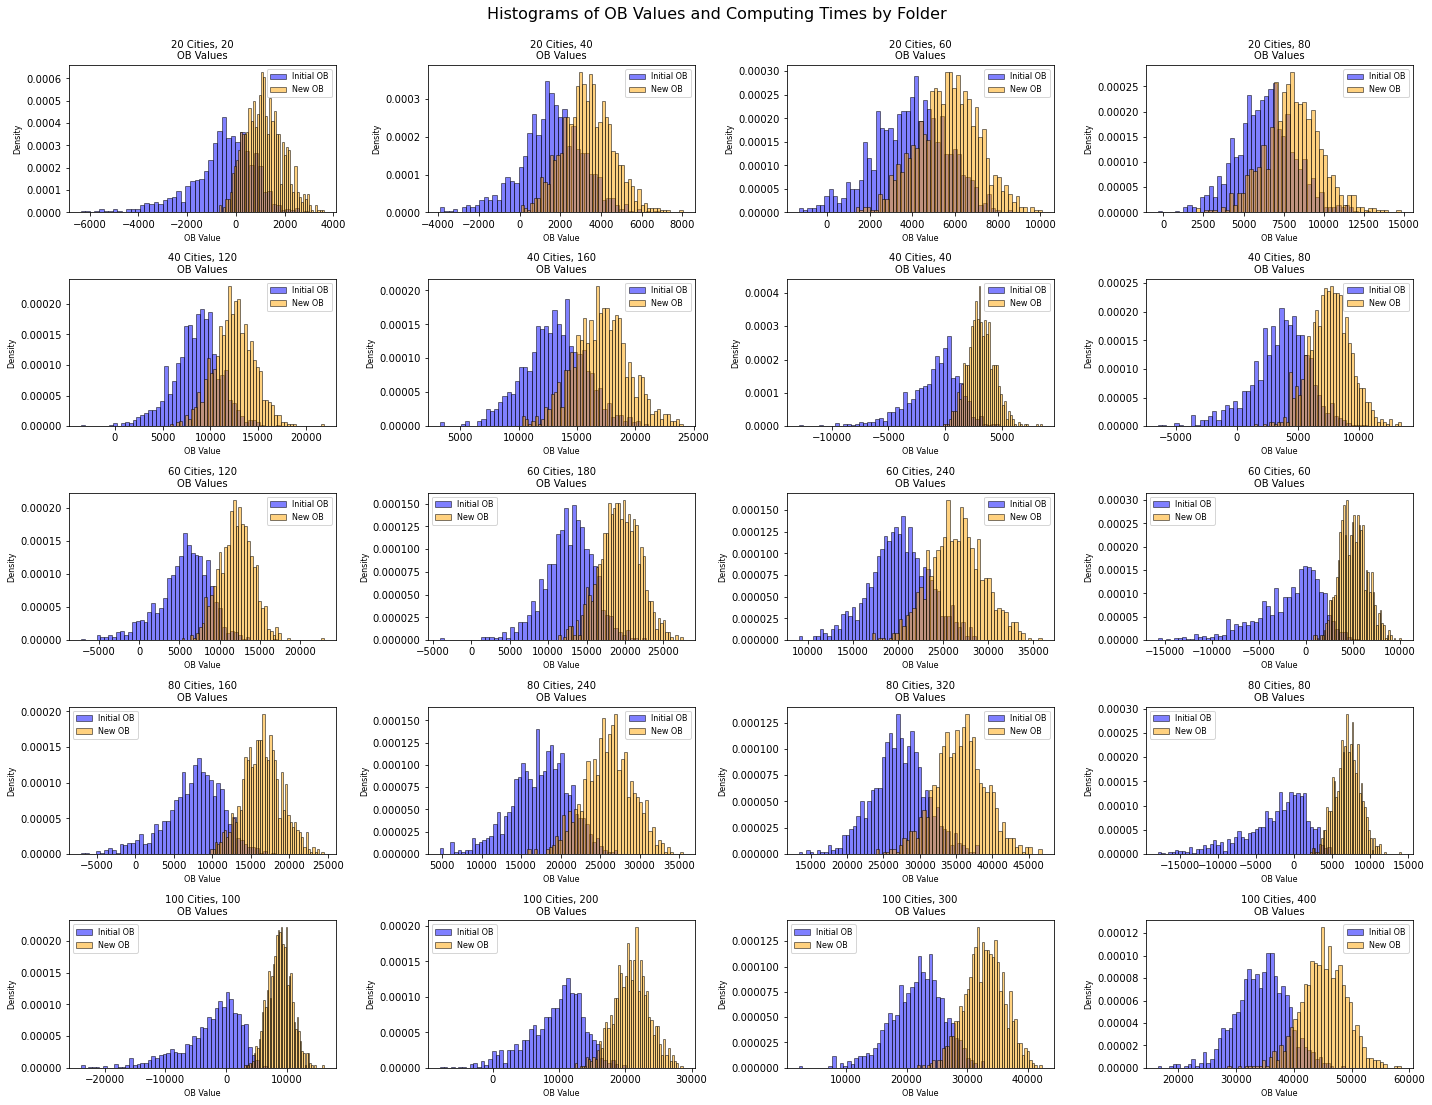

In [83]:
json_folder = "SA_tsp_swapping_results_1st_version"  # Replace with the actual folder path
plot_histograms_comparing_by_folder(json_folder, bins=50)

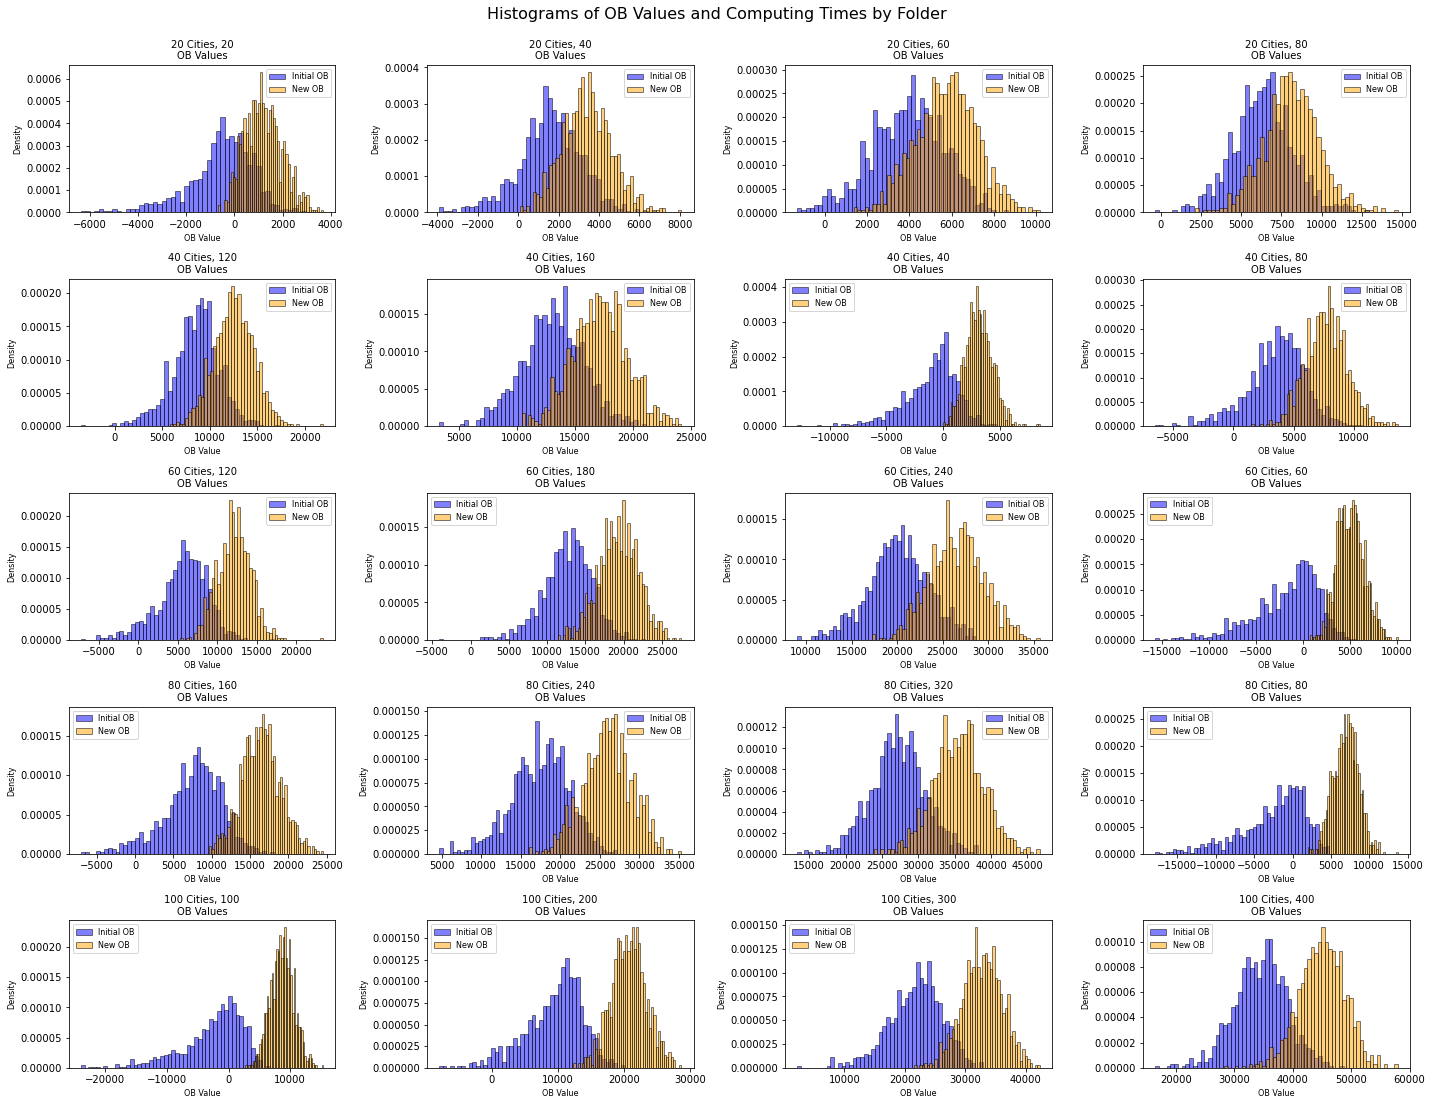

In [84]:
json_folder = "SA_tsp_swapping_results_2nd_version"  # Replace with the actual folder path
plot_histograms_comparing_by_folder(json_folder, bins=50)

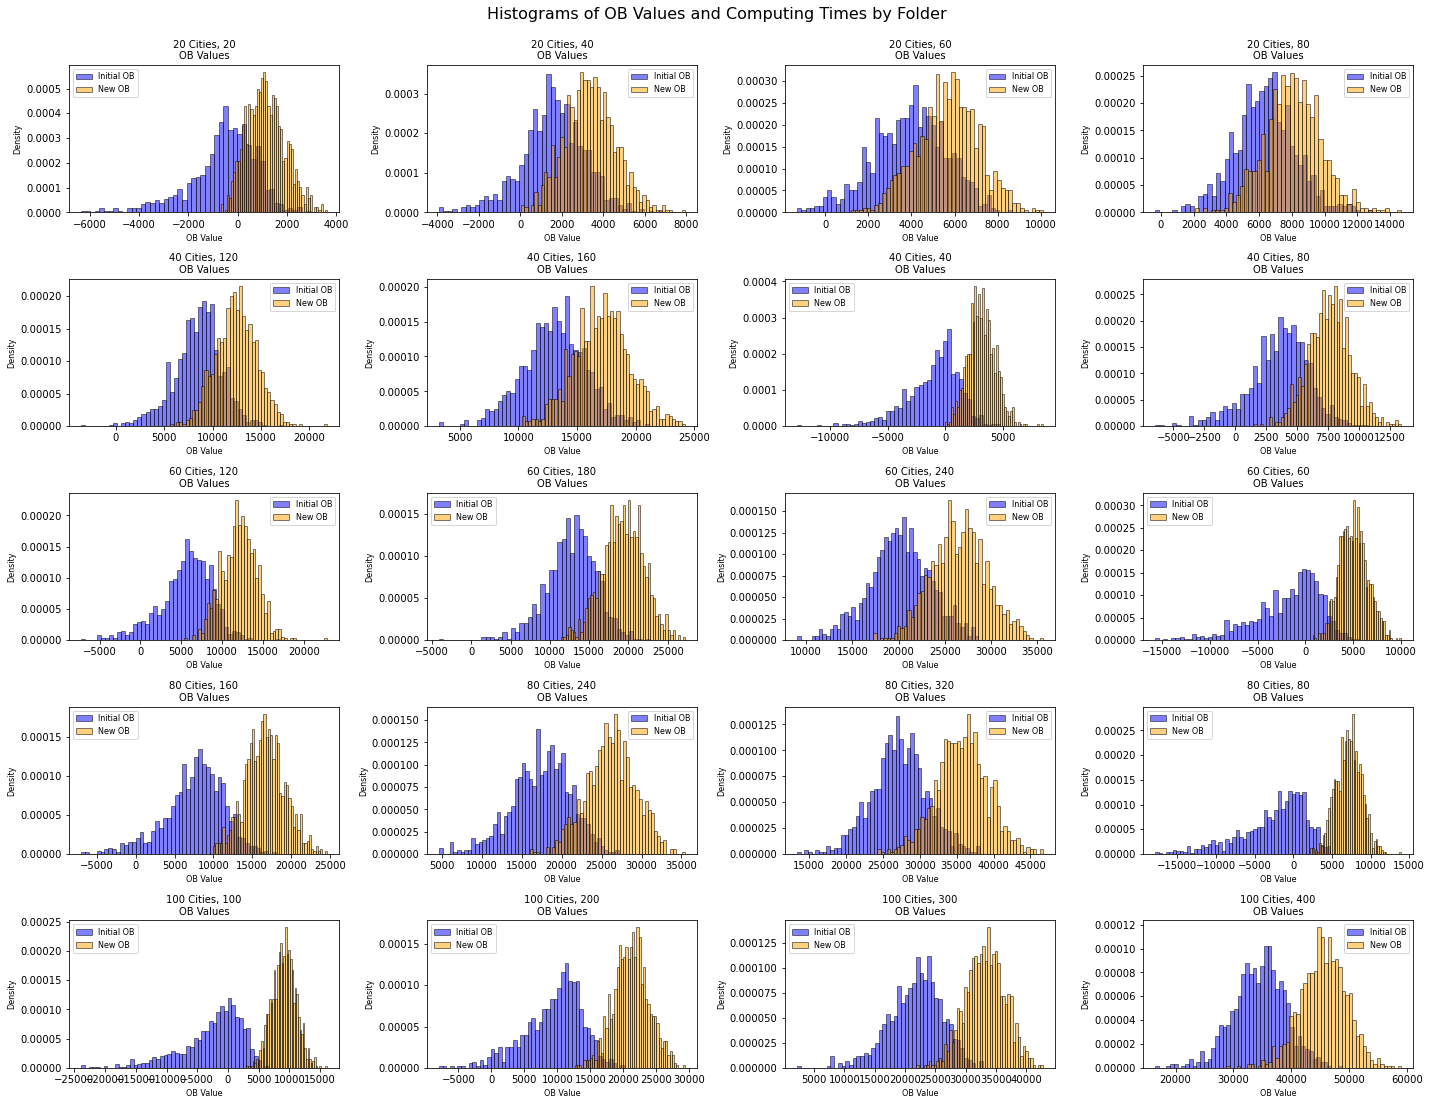

In [85]:
json_folder = "SA_tsp_swapping_results"  # Replace with the actual folder path
plot_histograms_comparing_by_folder(json_folder, bins=50)

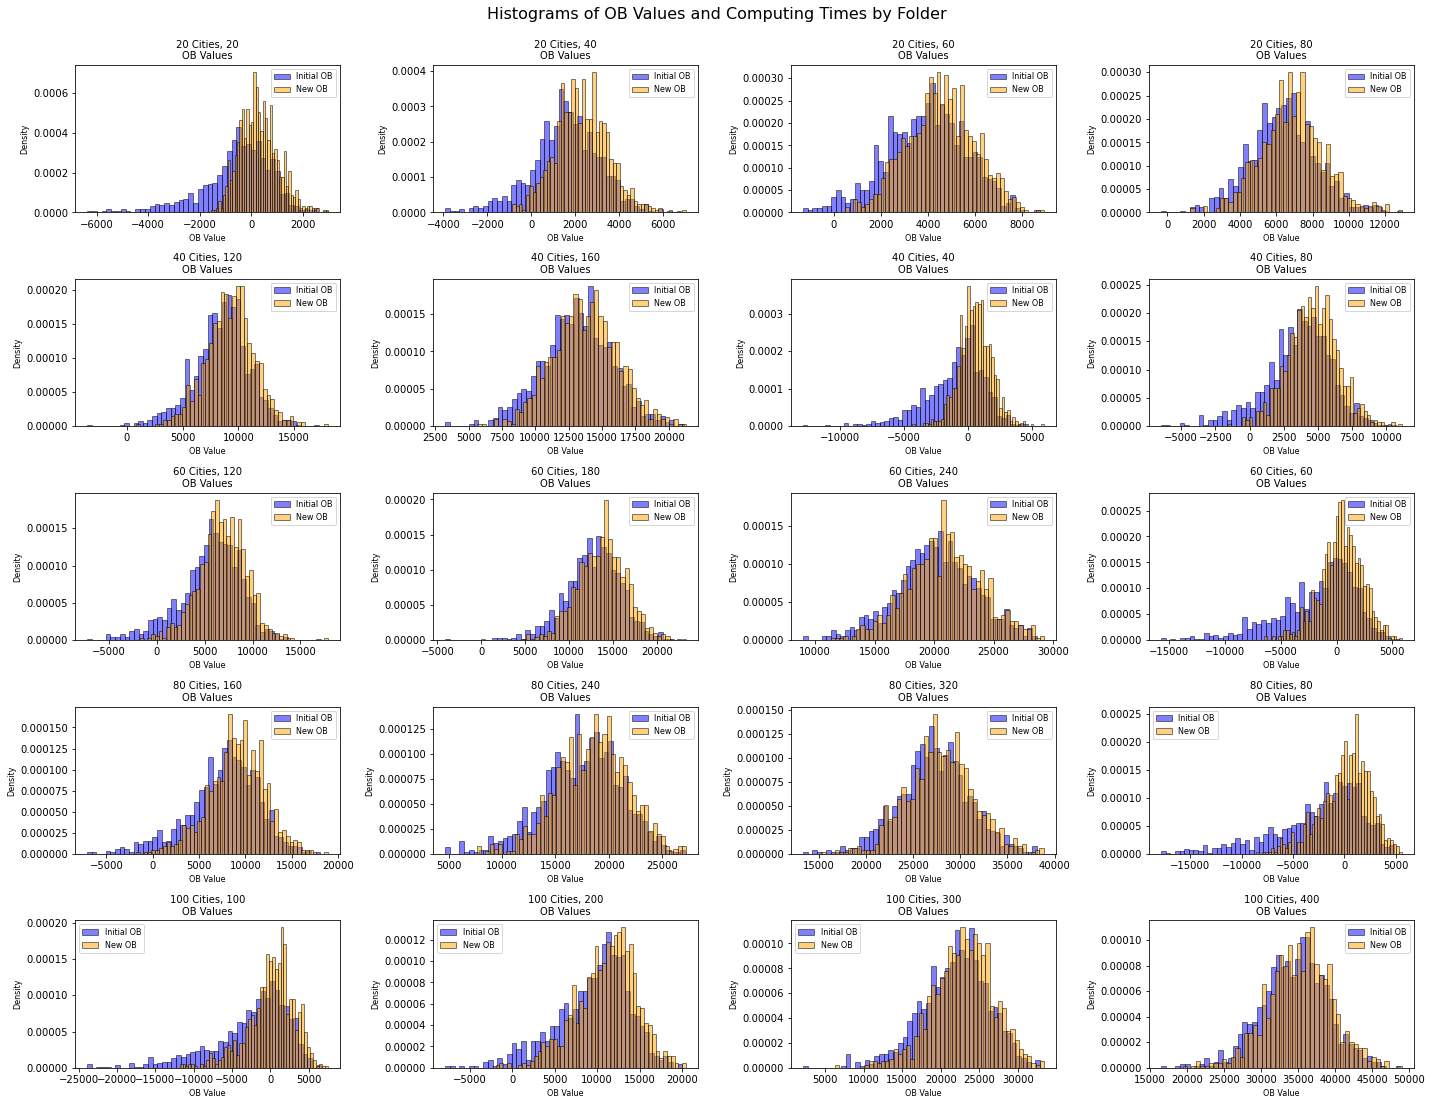

In [86]:
json_folder = "SA_KP_results_1st_version"  # Replace with the actual folder path
plot_histograms_comparing_by_folder(json_folder, bins=50)

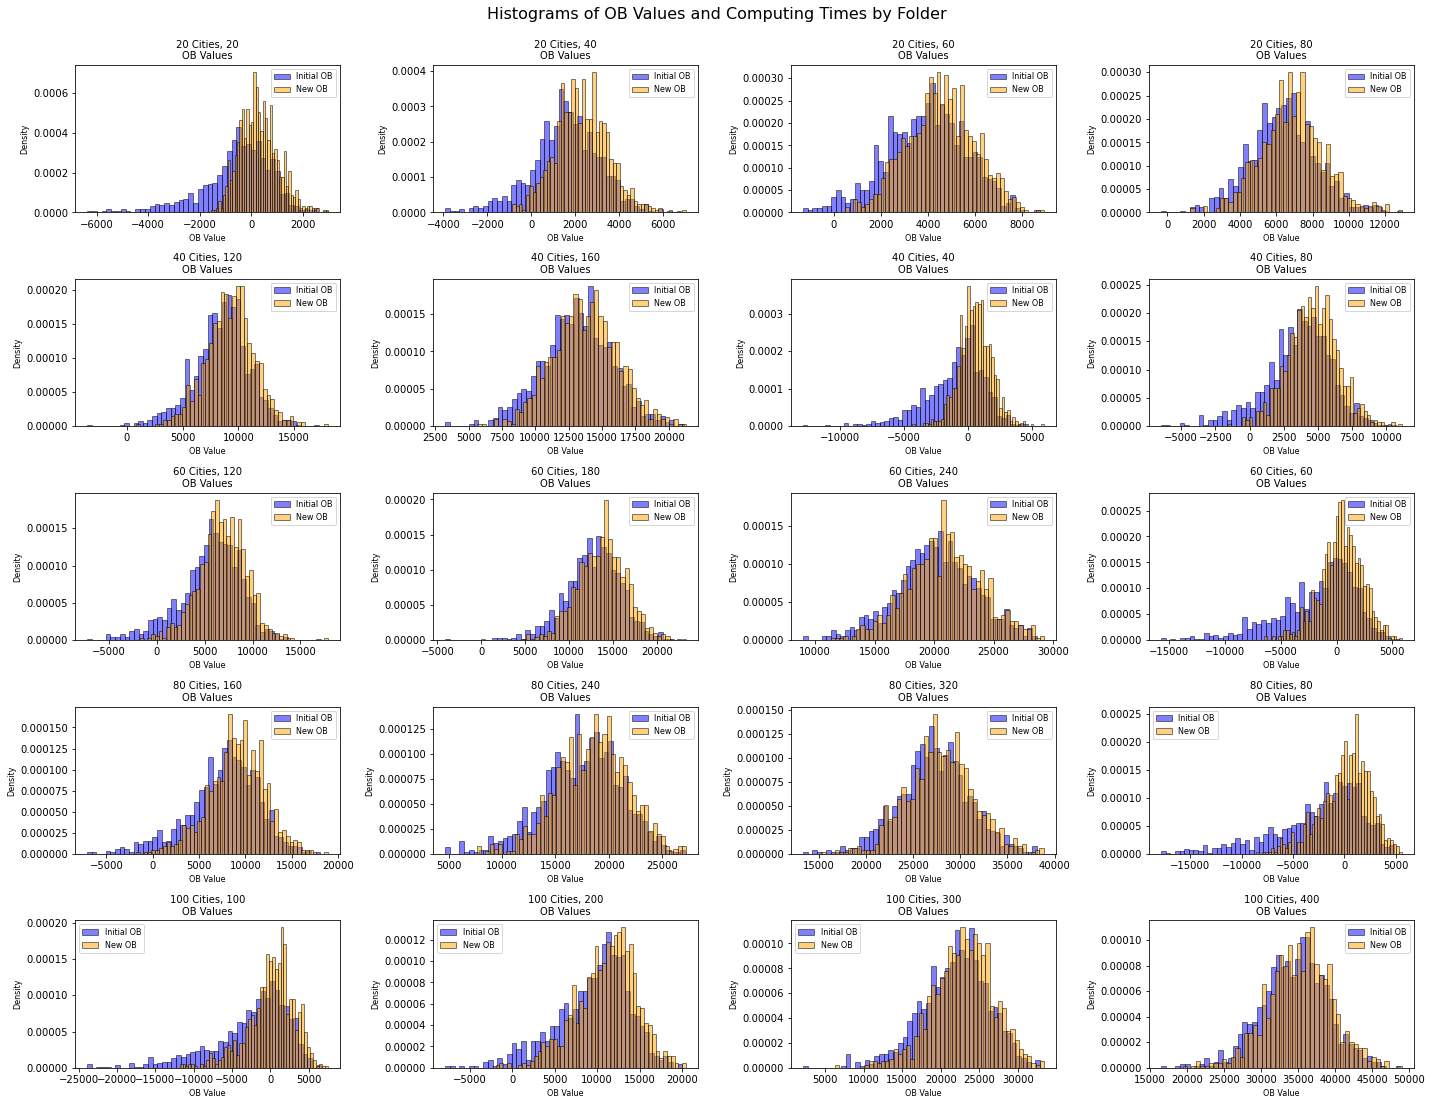

In [87]:
json_folder = "SA_KP_results-2nd_version"  # Replace with the actual folder path
plot_histograms_comparing_by_folder(json_folder, bins=50)

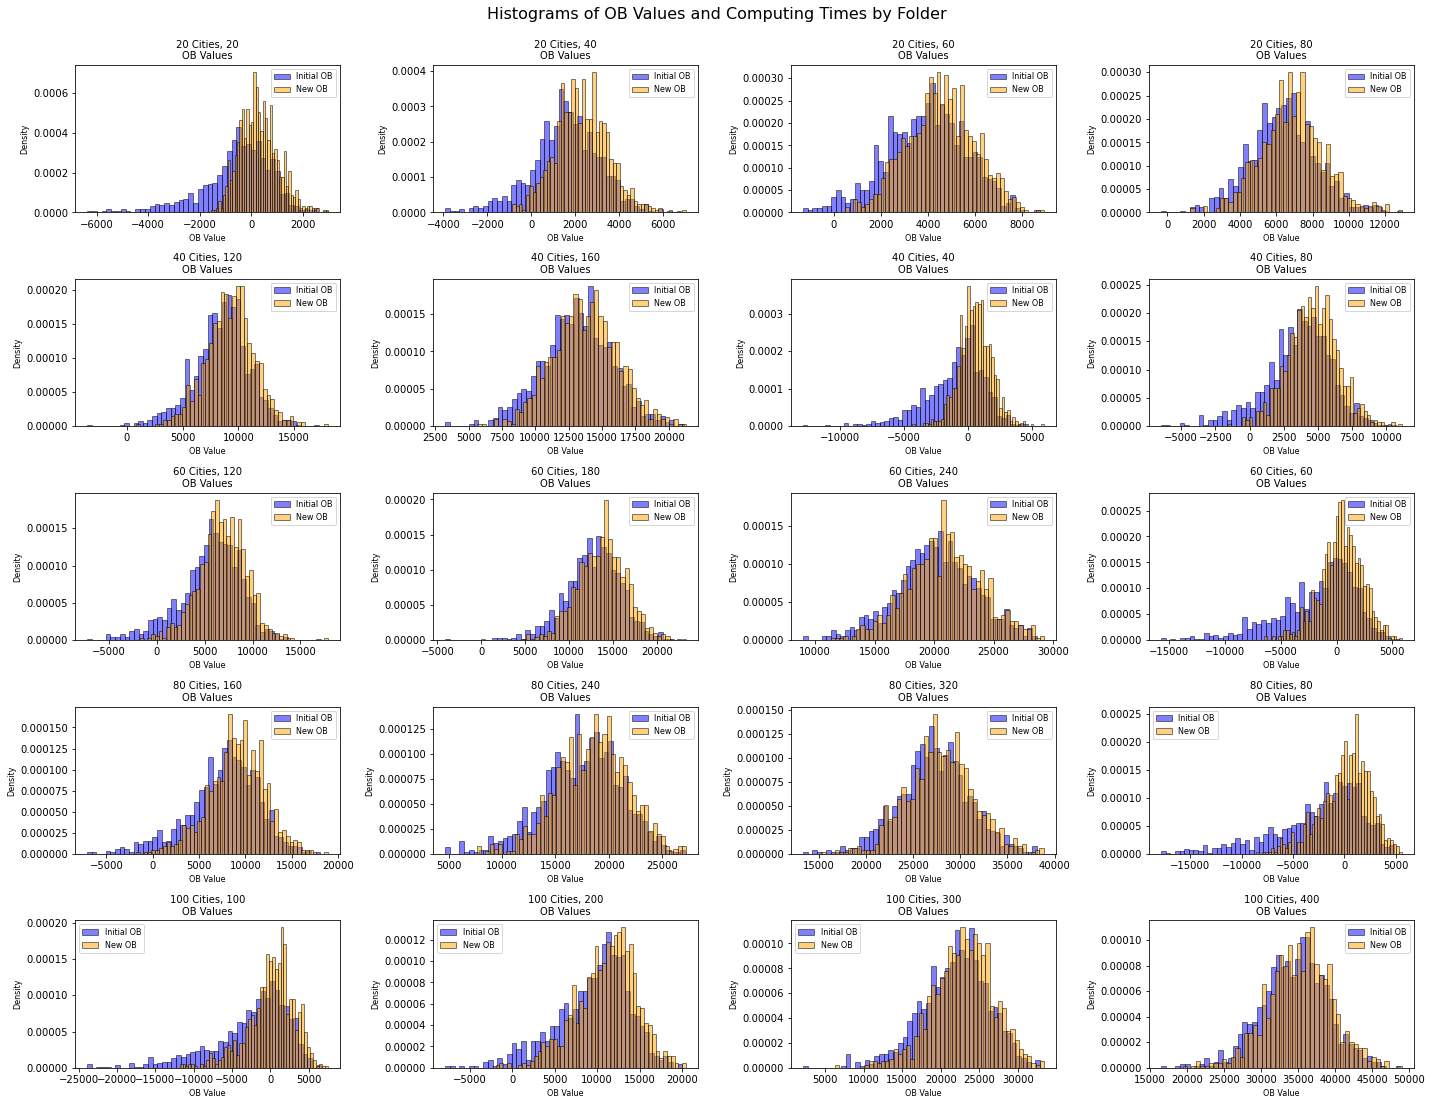

In [88]:
json_folder = "SA_KP_results"  # Replace with the actual folder path
plot_histograms_comparing_by_folder(json_folder, bins=50)

In [89]:

# Load the results (replace this with your actual JSON data)
with open("aco_grid_search_results.json", "r") as file:
    results = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(results)


# Sort by 'group'
df_sorted = df.sort_values(by='group')

# Save sorted DataFrame to CSV
df_sorted.to_csv("sorted_results.csv", index=False)

# Display the sorted DataFrame in your terminal/IDE
print(df_sorted)

# Basic Summary Statistics
print("\nBest fitness per group:")
print(df_sorted.loc[df_sorted.groupby('group')['fitness'].idxmax()])

# Average fitness by group
average_fitness = df_sorted.groupby('group')['fitness'].mean()
print("\nAverage fitness by group:")
print(average_fitness)

        group  num_ants  alpha  beta  evaporation_rate  q_percentage  \
8159  100x100       200    1.5   3.0               0.7           0.2   
8007  100x100       100    0.5   1.0               0.7           0.2   
8006  100x100       100    0.5   1.0               0.7           0.2   
8005  100x100       100    0.5   1.0               0.7           0.1   
8004  100x100       100    0.5   1.0               0.7           0.1   
...       ...       ...    ...   ...               ...           ...   
6085    80x80        80    0.5   1.0               0.7           0.1   
6086    80x80        80    0.5   1.0               0.7           0.2   
6087    80x80        80    0.5   1.0               0.7           0.2   
6075    80x80        40    1.5   3.0               0.3           0.2   
5760    80x80        40    0.5   1.0               0.3           0.1   

      iterations       fitness  
8159         100  10927.391031  
8007         100  10229.471696  
8006          50   9110.319480  
800

Best Parameter Combinations by Group:
        group  num_ants  alpha  beta  evaporation_rate  q_percentage  \
7849  100x100       200    0.5   3.0               0.3           0.1   
8265  100x200        50    0.5   3.0               0.3           0.1   
8904  100x300       200    0.5   3.0               0.3           0.1   
9128  100x400        50    0.5   3.0               0.3           0.1   
264     20x20        40    0.5   3.0               0.3           0.1   
930     20x40        40    0.5   1.0               0.3           0.2   
1227    20x60        40    0.5   3.0               0.3           0.2   
1592    20x80        20    1.5   3.0               0.3           0.1   
3236   40x120        80    0.5   1.0               0.7           0.1   
3369   40x160        20    0.5   3.0               0.3           0.1   
2169    40x40        40    1.5   3.0               0.3           0.1   
2872    40x80        80    1.5   3.0               0.3           0.1   
4492   60x120       120   

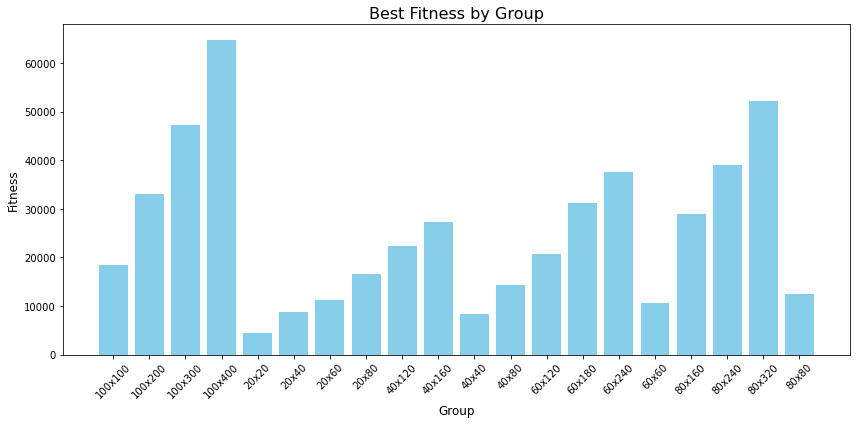

In [90]:
df = pd.DataFrame(results)


# Find the best combination for each group
best_combinations = df.loc[df.groupby('group')['fitness'].idxmax()]

# Display the best combinations as a table
print("Best Parameter Combinations by Group:")
print(best_combinations)

# Save the best combinations to a CSV for further analysis
best_combinations.to_csv('best_combinations_by_group.csv', index=False)

# Plot maximum fitness per group
plt.figure(figsize=(12, 6))
plt.bar(best_combinations['group'], best_combinations['fitness'], color='skyblue')
plt.title('Best Fitness by Group', fontsize=16)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Fitness', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
df = pd.DataFrame(results)

# Sort the data by 'group' and 'fitness' (descending)
df_sorted = df.sort_values(by=['group', 'fitness'], ascending=[True, False])

# Extract the top 10 rows for each group
top_10_per_group = df_sorted.groupby('group').head(10)

# Save the top 10 results per group to a CSV for further analysis
top_10_per_group.to_csv('top_10_combinations_by_group.csv', index=False)

# Display the top 10 results per group
print("Top 10 Parameter Combinations by Group:")
print(top_10_per_group)



Top 10 Parameter Combinations by Group:
        group  num_ants  alpha  beta  evaporation_rate  q_percentage  \
7849  100x100       200    0.5   3.0               0.3           0.1   
7848  100x100       200    0.5   3.0               0.3           0.1   
7852  100x100       200    0.5   3.0               0.7           0.1   
7866  100x100       200    1.5   3.0               0.3           0.2   
7833  100x100       100    1.5   3.0               0.3           0.1   
...       ...       ...    ...   ...               ...           ...   
6120    80x80       160    0.5   3.0               0.3           0.1   
6187    80x80        80    0.5   3.0               0.3           0.2   
6218    80x80       160    0.5   3.0               0.3           0.2   
5864    80x80        40    0.5   3.0               0.3           0.1   
6220    80x80       160    0.5   3.0               0.7           0.1   

      iterations       fitness  
7849         100  18435.537213  
7848          50  18366.52506

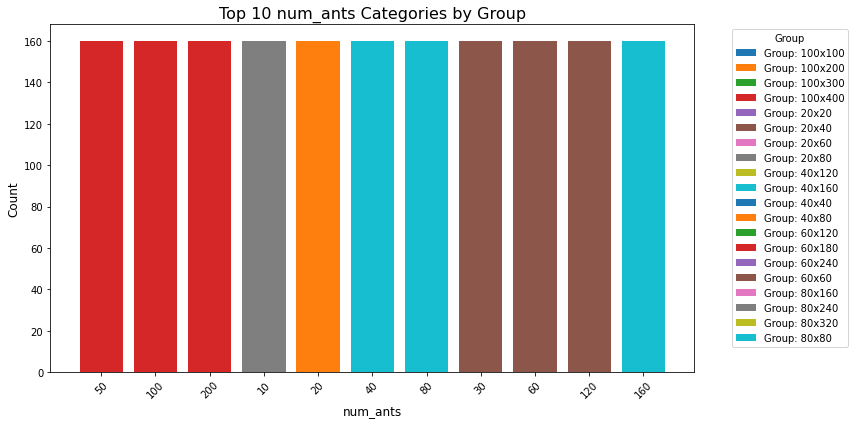

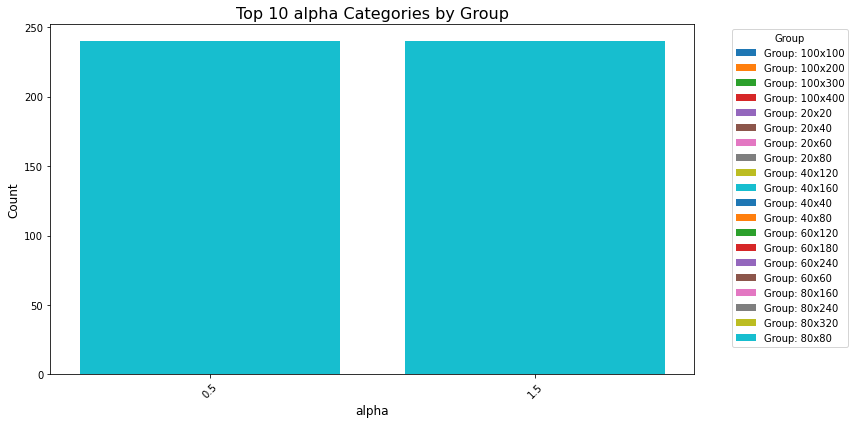

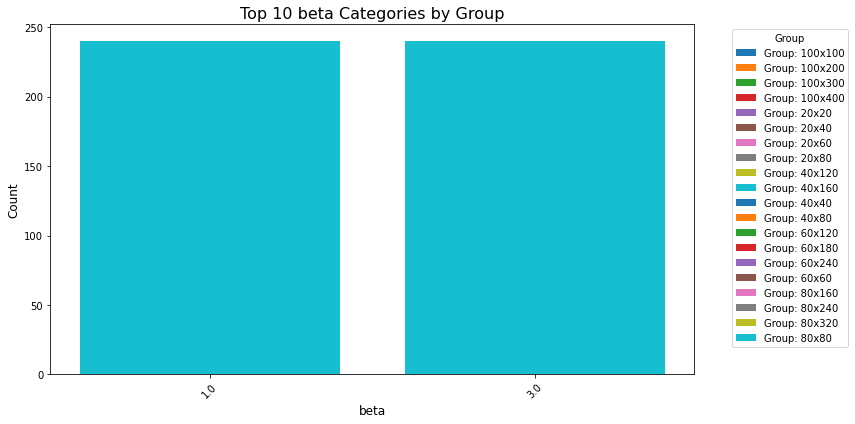

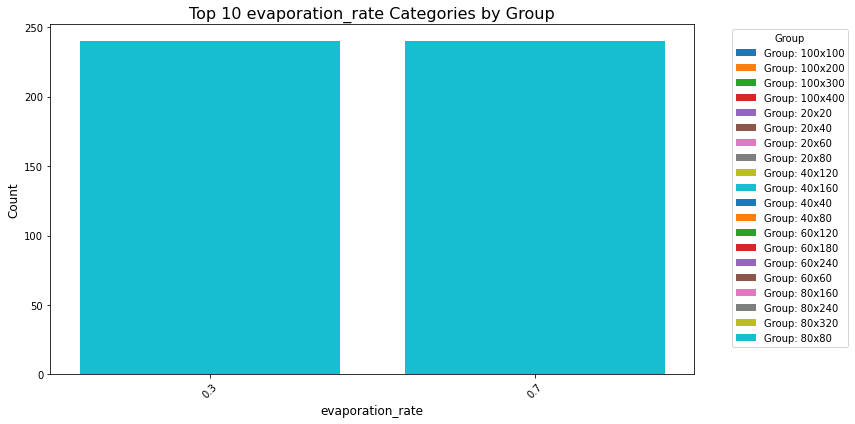

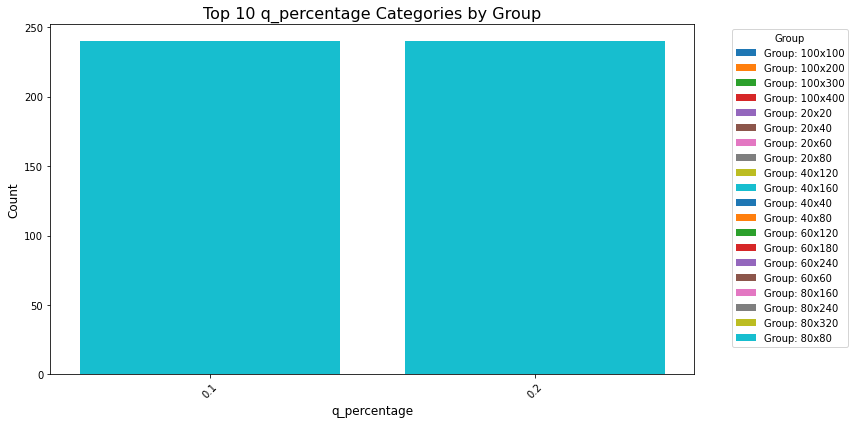

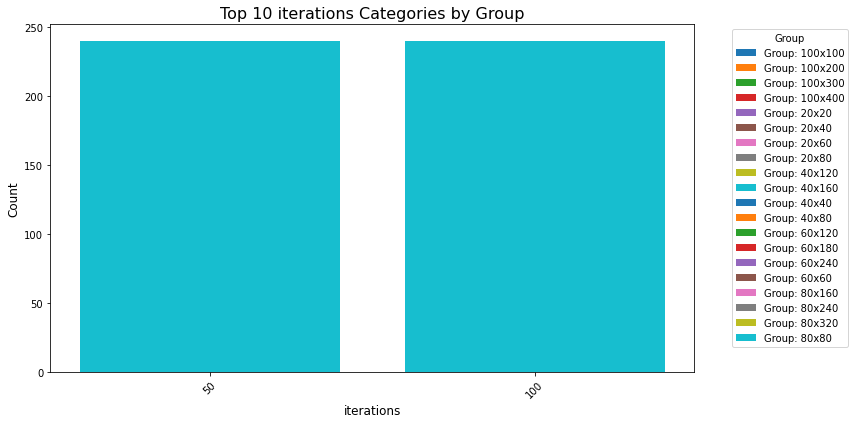

In [92]:
df = pd.DataFrame(results)

# List of parameters to analyze
parameters = ['num_ants', 'alpha', 'beta', 'evaporation_rate', 'q_percentage', 'iterations']

# Loop through each parameter
for param in parameters:
    # Count occurrences of each parameter value within each group
    param_counts = df.groupby(['group', param]).size().reset_index(name='count')

    # Filter to get the top 10 categories for each group
    top_10_counts = (
        param_counts.sort_values(['group', 'count'], ascending=[True, False])
        .groupby('group')
        .head(10)
    )

    # Create a bar chart for the top 10 categories for each group
    plt.figure(figsize=(12, 6))
    for group_name, group_data in top_10_counts.groupby('group'):
        plt.bar(
            group_data[param].astype(str),  # Convert categories to strings for readability
            group_data['count'],
            label=f"Group: {group_name}"
        )

    # Add chart titles and labels
    plt.title(f'Top 10 {param} Categories by Group', fontsize=16)
    plt.xlabel(param, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

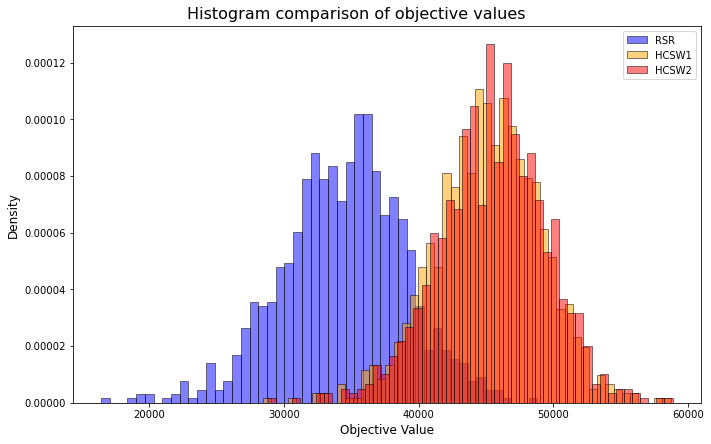

In [98]:
def plot_histograms_comparing_by_results2(json_folder,json_folder2, bins):
  
    all_results = []
    all_results2=[]

    # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder):
        json_file_path = os.path.join(json_folder, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results:
        print("No valid data found in the folder.")
        return
    # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder2):
        json_file_path = os.path.join(json_folder2, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results2.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results2:
        print("No valid data found in the folder2.")
        return
    
    # Extract values for plotting
    initial_ob_values = [result['initial_OB_value'] for result in all_results if 'initial_OB_value' in result]
    new_ob_values = [result['new_OB_value'] for result in all_results if 'new_OB_value' in result]
    new_ob_values2 = [result['new_OB_value'] for result in all_results2 if 'new_OB_value' in result]

    computing_times = [result['computing_time'] for result in all_results if 'computing_time' in result]

    # Plot histograms
    plt.figure(figsize=(10, 6))

    # Histogram of OB Values
    plt.subplot(1, 1, 1)
    plt.hist(initial_ob_values, bins=bins, alpha=0.5, label='RSR', color='blue', edgecolor='black', density=True)
    plt.hist(new_ob_values, bins=bins, alpha=0.5, label='HCSW1', color='orange', edgecolor='black', density=True)
    plt.hist(new_ob_values2, bins=bins, alpha=0.5, label='HCSW2', color='red', edgecolor='black', density=True)
   # plt.title('Hist', fontsize=14)
    plt.xlabel('Objective Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=10)

    # Histogram of Computing Times
    #plt.subplot(1, 2, 2)
    #plt.hist(computing_times, bins=bins, color='green', edgecolor='black')
    #plt.title('Histogram of Computing Times', fontsize=14)
    #plt.xlabel('Computing Time (seconds)', fontsize=12)
    #plt.ylabel('Frequency', fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.suptitle('Histogram comparison of objective values', fontsize=16, y=1.02)
    plt.show()

# Example usage
json_folder = "hillclimber_tsp_swapping_results_2nd_version/TTP_instances_100_items_400"
json_folder2 = "hillclimber_tsp_swapping_results_3rd/TTP_instances_100_items_400"

plot_histograms_comparing_by_results2(json_folder,json_folder2, bins=50)

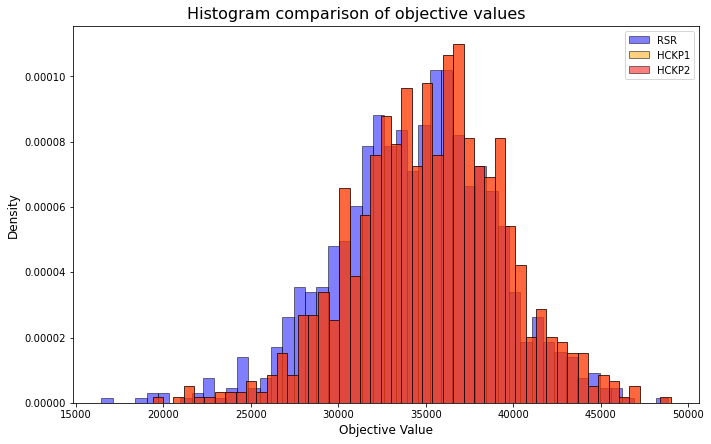

In [101]:
def plot_histograms_comparing_by_results2(json_folder,json_folder2, bins):
  
    all_results = []
    all_results2=[]

    # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder):
        json_file_path = os.path.join(json_folder, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results:
        print("No valid data found in the folder.")
        return
    # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder2):
        json_file_path = os.path.join(json_folder2, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results2.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results2:
        print("No valid data found in the folder2.")
        return
    
    # Extract values for plotting
    initial_ob_values = [result['initial_OB_value'] for result in all_results if 'initial_OB_value' in result]
    new_ob_values = [result['new_OB_value'] for result in all_results if 'new_OB_value' in result]
    new_ob_values2 = [result['new_OB_value'] for result in all_results2 if 'new_OB_value' in result]

    computing_times = [result['computing_time'] for result in all_results if 'computing_time' in result]

    # Plot histograms
    plt.figure(figsize=(10, 6))

    # Histogram of OB Values
    plt.subplot(1, 1, 1)
    plt.hist(initial_ob_values, bins=bins, alpha=0.5, label='RSR', color='blue', edgecolor='black', density=True)
    plt.hist(new_ob_values, bins=bins, alpha=0.5, label='HCKP1', color='orange', edgecolor='black', density=True)
    plt.hist(new_ob_values2, bins=bins, alpha=0.5, label='HCKP2', color='red', edgecolor='black', density=True)
   # plt.title('Hist', fontsize=14)
    plt.xlabel('Objective Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=10)

    # Histogram of Computing Times
    #plt.subplot(1, 2, 2)
    #plt.hist(computing_times, bins=bins, color='green', edgecolor='black')
    #plt.title('Histogram of Computing Times', fontsize=14)
    #plt.xlabel('Computing Time (seconds)', fontsize=12)
    #plt.ylabel('Frequency', fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.suptitle('Histogram comparison of objective values', fontsize=16, y=1.02)
    plt.show()

# Example usage
json_folder = "hillclimber_KP_results_2nd_version/TTP_instances_100_items_400"
json_folder2 = "hillclimber_KP_results_3rd/TTP_instances_100_items_400"

plot_histograms_comparing_by_results2(json_folder,json_folder2, bins=50)

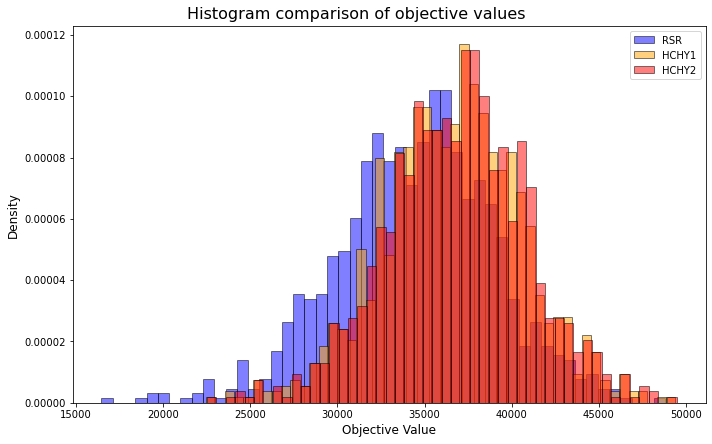

In [103]:
def plot_histograms_comparing_by_results2(json_folder,json_folder2, bins):
  
    all_results = []
    all_results2=[]

    # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder):
        json_file_path = os.path.join(json_folder, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results:
        print("No valid data found in the folder.")
        return
    # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder2):
        json_file_path = os.path.join(json_folder2, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results2.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results2:
        print("No valid data found in the folder2.")
        return
    
    # Extract values for plotting
    initial_ob_values = [result['initial_OB_value'] for result in all_results if 'initial_OB_value' in result]
    new_ob_values = [result['new_OB_value'] for result in all_results if 'new_OB_value' in result]
    new_ob_values2 = [result['new_OB_value'] for result in all_results2 if 'new_OB_value' in result]

    computing_times = [result['computing_time'] for result in all_results if 'computing_time' in result]

    # Plot histograms
    plt.figure(figsize=(10, 6))

    # Histogram of OB Values
    plt.subplot(1, 1, 1)
    plt.hist(initial_ob_values, bins=bins, alpha=0.5, label='RSR', color='blue', edgecolor='black', density=True)
    plt.hist(new_ob_values, bins=bins, alpha=0.5, label='HCHY1', color='orange', edgecolor='black', density=True)
    plt.hist(new_ob_values2, bins=bins, alpha=0.5, label='HCHY2', color='red', edgecolor='black', density=True)
   # plt.title('Hist', fontsize=14)
    plt.xlabel('Objective Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=10)

    # Histogram of Computing Times
    #plt.subplot(1, 2, 2)
    #plt.hist(computing_times, bins=bins, color='green', edgecolor='black')
    #plt.title('Histogram of Computing Times', fontsize=14)
    #plt.xlabel('Computing Time (seconds)', fontsize=12)
    #plt.ylabel('Frequency', fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.suptitle('Histogram comparison of objective values', fontsize=16, y=1.02)
    plt.show()

# Example usage
json_folder = "hillclimber_hybride_results_2nd_version/TTP_instances_100_items_400"
json_folder2 = "hillclimber_hybride_results_3rd/TTP_instances_100_items_400"

plot_histograms_comparing_by_results2(json_folder,json_folder2, bins=50)

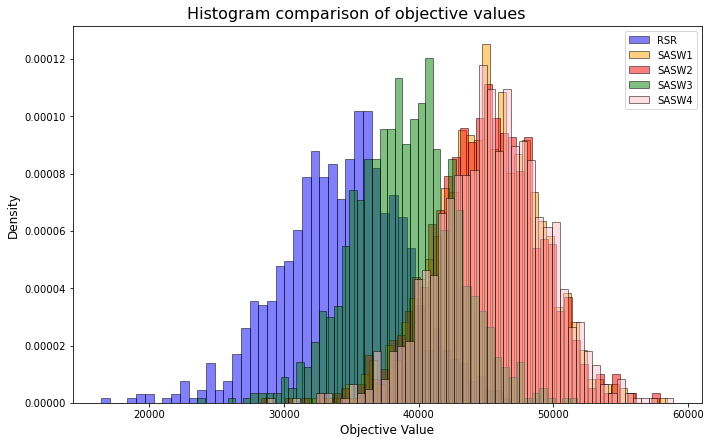

In [142]:
def plot_histograms_comparing_by_results3(json_folder,json_folder2,json_folder3,json_folder4, bins):
  
    all_results = []
    all_results2=[]
    all_results3=[]
    all_results4=[]



    # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder):
        json_file_path = os.path.join(json_folder, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results:
        print("No valid data found in the folder.")
        return
    
    # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder2):
        json_file_path = os.path.join(json_folder2, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results2.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results2:
        print("No valid data found in the folder2.")
        return
    
        # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder3):
        json_file_path = os.path.join(json_folder3, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results3.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results3:
        print("No valid data found in the folder3.")
        return
    
            # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder4):
        json_file_path = os.path.join(json_folder4, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results4.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results4:
        print("No valid data found in the folder4.")
        return
    # Extract values for plotting
    initial_ob_values = [result['initial_OB_value'] for result in all_results if 'initial_OB_value' in result]
    new_ob_values = [result['new_OB_value'] for result in all_results if 'new_OB_value' in result]
    new_ob_values2 = [result['new_OB_value'] for result in all_results2 if 'new_OB_value' in result]
    new_ob_values3 = [result['new_OB_value'] for result in all_results3 if 'new_OB_value' in result]
    new_ob_values4 = [result['new_OB_value'] for result in all_results4 if 'new_OB_value' in result]

    computing_times = [result['computing_time'] for result in all_results if 'computing_time' in result]

    # Plot histograms
    plt.figure(figsize=(10, 6))

    # Histogram of OB Values
    plt.subplot(1, 1, 1)
    plt.hist(initial_ob_values, bins=bins, alpha=0.5, label='RSR', color='blue', edgecolor='black', density=True)
    plt.hist(new_ob_values, bins=bins, alpha=0.5, label='SASW1', color='orange', edgecolor='black', density=True)
    plt.hist(new_ob_values2, bins=bins, alpha=0.5, label='SASW2', color='red', edgecolor='black', density=True)
    plt.hist(new_ob_values3, bins=bins, alpha=0.5, label='SASW3', color='green', edgecolor='black', density=True)
    plt.hist(new_ob_values4, bins=bins, alpha=0.5, label='SASW4', color='pink', edgecolor='black', density=True)

    # plt.title('Hist', fontsize=14)
    plt.xlabel('Objective Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=10)

    # Histogram of Computing Times
    #plt.subplot(1, 2, 2)
    #plt.hist(computing_times, bins=bins, color='green', edgecolor='black')
    #plt.title('Histogram of Computing Times', fontsize=14)
    #plt.xlabel('Computing Time (seconds)', fontsize=12)
    #plt.ylabel('Frequency', fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.suptitle('Histogram comparison of objective values', fontsize=16, y=1.02)
    plt.show()

# Example usage
json_folder = "SA_tsp_swapping_results_1st_version/TTP_instances_100_items_400"
json_folder2 = "SA_tsp_swapping_results_2nd_version/TTP_instances_100_items_400"
json_folder3 = "SA_tsp_swapping_results_3rd/TTP_instances_100_items_400"
json_folder4 = "SA_tsp_swapping_results/TTP_instances_100_items_400"

plot_histograms_comparing_by_results3(json_folder,json_folder2,json_folder3,json_folder4, bins=50)

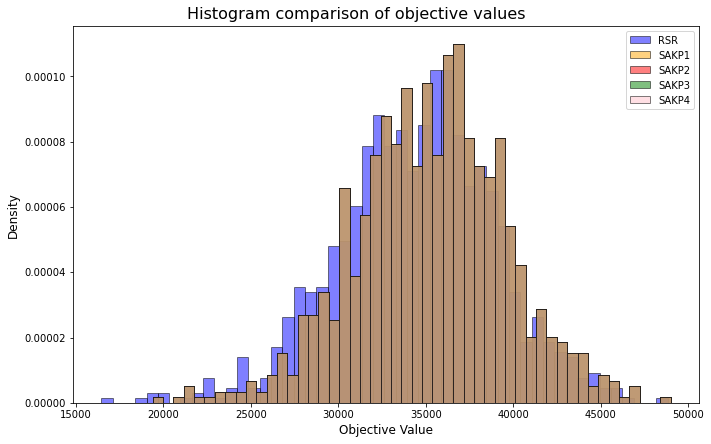

In [111]:
def plot_histograms_comparing_by_results3(json_folder,json_folder2,json_folder3,json_folder4, bins):
  
    all_results = []
    all_results2=[]
    all_results3=[]
    all_results4=[]



    # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder):
        json_file_path = os.path.join(json_folder, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results:
        print("No valid data found in the folder.")
        return
    
    # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder2):
        json_file_path = os.path.join(json_folder2, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results2.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results2:
        print("No valid data found in the folder2.")
        return
    
        # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder3):
        json_file_path = os.path.join(json_folder3, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results3.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results3:
        print("No valid data found in the folder3.")
        return
    
            # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder4):
        json_file_path = os.path.join(json_folder4, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results4.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results4:
        print("No valid data found in the folder4.")
        return
    # Extract values for plotting
    initial_ob_values = [result['initial_OB_value'] for result in all_results if 'initial_OB_value' in result]
    new_ob_values = [result['new_OB_value'] for result in all_results if 'new_OB_value' in result]
    new_ob_values2 = [result['new_OB_value'] for result in all_results2 if 'new_OB_value' in result]
    new_ob_values3 = [result['new_OB_value'] for result in all_results3 if 'new_OB_value' in result]
    new_ob_values4 = [result['new_OB_value'] for result in all_results4 if 'new_OB_value' in result]

    computing_times = [result['computing_time'] for result in all_results if 'computing_time' in result]

    # Plot histograms
    plt.figure(figsize=(10, 6))

    # Histogram of OB Values
    plt.subplot(1, 1, 1)
    plt.hist(initial_ob_values, bins=bins, alpha=0.5, label='RSR', color='blue', edgecolor='black', density=True)
    plt.hist(new_ob_values, bins=bins, alpha=0.5, label='SAKP1', color='orange', edgecolor='black', density=True)
    plt.hist(new_ob_values2, bins=bins, alpha=0.5, label='SAKP2', color='red', edgecolor='black', density=True)
    plt.hist(new_ob_values3, bins=bins, alpha=0.5, label='SAKP3', color='green', edgecolor='black', density=True)
    plt.hist(new_ob_values4, bins=bins, alpha=0.5, label='SAKP4', color='pink', edgecolor='black', density=True)

    # plt.title('Hist', fontsize=14)
    plt.xlabel('Objective Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=10)

    # Histogram of Computing Times
    #plt.subplot(1, 2, 2)
    #plt.hist(computing_times, bins=bins, color='green', edgecolor='black')
    #plt.title('Histogram of Computing Times', fontsize=14)
    #plt.xlabel('Computing Time (seconds)', fontsize=12)
    #plt.ylabel('Frequency', fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.suptitle('Histogram comparison of objective values', fontsize=16, y=1.02)
    plt.show()

# Example usage
json_folder = "SA_KP_results_1st_version/TTP_instances_100_items_400"
json_folder2 = "SA_KP_results-2nd_version/TTP_instances_100_items_400"
json_folder3 = "SA_KP_results_3rd/TTP_instances_100_items_400"
json_folder4 = "SA_KP_results/TTP_instances_100_items_400"

plot_histograms_comparing_by_results3(json_folder,json_folder2,json_folder3,json_folder4, bins=50)

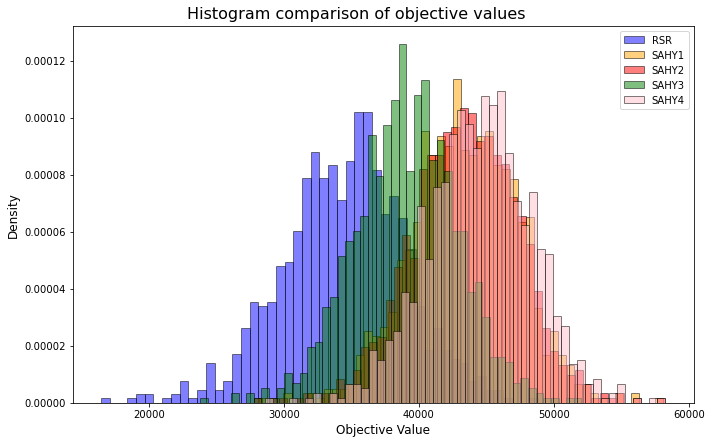

In [113]:
def plot_histograms_comparing_by_results3(json_folder,json_folder2,json_folder3,json_folder4, bins):
  
    all_results = []
    all_results2=[]
    all_results3=[]
    all_results4=[]



    # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder):
        json_file_path = os.path.join(json_folder, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results:
        print("No valid data found in the folder.")
        return
    
    # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder2):
        json_file_path = os.path.join(json_folder2, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results2.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results2:
        print("No valid data found in the folder2.")
        return
    
        # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder3):
        json_file_path = os.path.join(json_folder3, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results3.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results3:
        print("No valid data found in the folder3.")
        return
    
            # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder4):
        json_file_path = os.path.join(json_folder4, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results4.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results4:
        print("No valid data found in the folder4.")
        return
    # Extract values for plotting
    initial_ob_values = [result['initial_OB_value'] for result in all_results if 'initial_OB_value' in result]
    new_ob_values = [result['new_OB_value'] for result in all_results if 'new_OB_value' in result]
    new_ob_values2 = [result['new_OB_value'] for result in all_results2 if 'new_OB_value' in result]
    new_ob_values3 = [result['new_OB_value'] for result in all_results3 if 'new_OB_value' in result]
    new_ob_values4 = [result['new_OB_value'] for result in all_results4 if 'new_OB_value' in result]

    computing_times = [result['computing_time'] for result in all_results if 'computing_time' in result]

    # Plot histograms
    plt.figure(figsize=(10, 6))

    # Histogram of OB Values
    plt.subplot(1, 1, 1)
    plt.hist(initial_ob_values, bins=bins, alpha=0.5, label='RSR', color='blue', edgecolor='black', density=True)
    plt.hist(new_ob_values, bins=bins, alpha=0.5, label='SAHY1', color='orange', edgecolor='black', density=True)
    plt.hist(new_ob_values2, bins=bins, alpha=0.5, label='SAHY2', color='red', edgecolor='black', density=True)
    plt.hist(new_ob_values3, bins=bins, alpha=0.5, label='SAHY3', color='green', edgecolor='black', density=True)
    plt.hist(new_ob_values4, bins=bins, alpha=0.5, label='SAHY4', color='pink', edgecolor='black', density=True)

    # plt.title('Hist', fontsize=14)
    plt.xlabel('Objective Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=10)

    # Histogram of Computing Times
    #plt.subplot(1, 2, 2)
    #plt.hist(computing_times, bins=bins, color='green', edgecolor='black')
    #plt.title('Histogram of Computing Times', fontsize=14)
    #plt.xlabel('Computing Time (seconds)', fontsize=12)
    #plt.ylabel('Frequency', fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.suptitle('Histogram comparison of objective values', fontsize=16, y=1.02)
    plt.show()

# Example usage
json_folder = "SA_hybride_results_1st_version/TTP_instances_100_items_400"
json_folder2 = "SA_hybride_results_2nd_version/TTP_instances_100_items_400"
json_folder3 = "SA_hybride_results_3rd/TTP_instances_100_items_400"
json_folder4 = "SA_hybride_results/TTP_instances_100_items_400"

plot_histograms_comparing_by_results3(json_folder,json_folder2,json_folder3,json_folder4, bins=50)

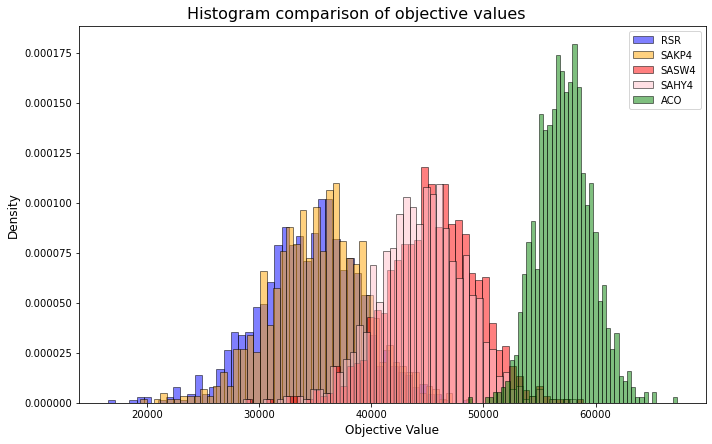

In [145]:
def plot_histograms_comparing_by_results3(json_folder,json_folder2,json_folder3,json_folder4, bins):
  
    all_results = []
    all_results2=[]
    all_results3=[]
    all_results4=[]



    # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder):
        json_file_path = os.path.join(json_folder, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results:
        print("No valid data found in the folder.")
        return
    
    # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder2):
        json_file_path = os.path.join(json_folder2, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results2.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results2:
        print("No valid data found in the folder2.")
        return
    
        # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder3):
        json_file_path = os.path.join(json_folder3, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results3.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results3:
        print("No valid data found in the folder3.")
        return
    
            # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder4):
        json_file_path = os.path.join(json_folder4, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results4.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results4:
        print("No valid data found in the folder4.")
        return
    # Extract values for plotting
    initial_ob_values = [result['initial_OB_value'] for result in all_results if 'initial_OB_value' in result]
    new_ob_values = [result['new_OB_value'] for result in all_results if 'new_OB_value' in result]
    new_ob_values2 = [result['new_OB_value'] for result in all_results2 if 'new_OB_value' in result]
    new_ob_values3 = [result['new_OB_value'] for result in all_results3 if 'new_OB_value' in result]
    new_ob_values4 = [result['OB_value'] for result in all_results4 if 'OB_value' in result]

    computing_times = [result['computing_time'] for result in all_results if 'computing_time' in result]

    # Plot histograms
    plt.figure(figsize=(10, 6))

    # Histogram of OB Values
    plt.subplot(1, 1, 1)
    plt.hist(initial_ob_values, bins=bins, alpha=0.5, label='RSR', color='blue', edgecolor='black', density=True)
    plt.hist(new_ob_values, bins=bins, alpha=0.5, label='SAKP4', color='orange', edgecolor='black', density=True)
    plt.hist(new_ob_values2, bins=bins, alpha=0.5, label='SASW4', color='red', edgecolor='black', density=True)
    plt.hist(new_ob_values3, bins=bins, alpha=0.5, label='SAHY4', color='pink', edgecolor='black', density=True)
    plt.hist(new_ob_values4, bins=bins, alpha=0.5, label='ACO', color='green', edgecolor='black', density=True)

    # plt.title('Hist', fontsize=14)
    plt.xlabel('Objective Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=10)

    # Histogram of Computing Times
    #plt.subplot(1, 2, 2)
    #plt.hist(computing_times, bins=bins, color='green', edgecolor='black')
    #plt.title('Histogram of Computing Times', fontsize=14)
    #plt.xlabel('Computing Time (seconds)', fontsize=12)
    #plt.ylabel('Frequency', fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.suptitle('Histogram comparison of objective values', fontsize=16, y=1.02)
    plt.show()

# Example usage
json_folder = "SA_KP_results_1st_version/TTP_instances_100_items_400"
json_folder2 = "SA_tsp_swapping_results/TTP_instances_100_items_400"
json_folder3 = "SA_hybride_results/TTP_instances_100_items_400"
json_folder4 = "aco_results_100c_joint/TTP_instances_100_items_400"

plot_histograms_comparing_by_results3(json_folder,json_folder2,json_folder3,json_folder4, bins=50)

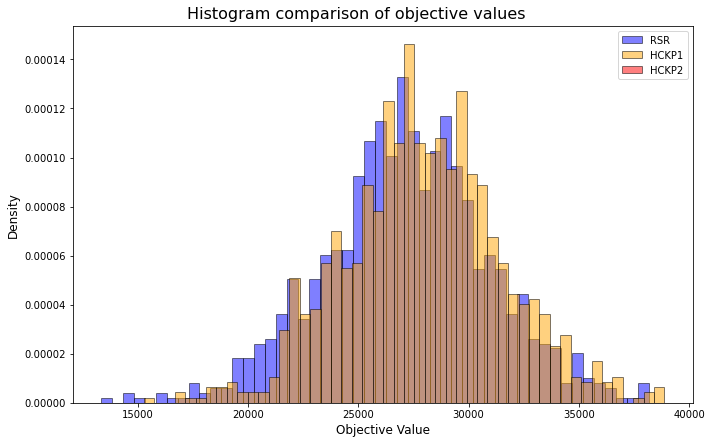

In [127]:
def plot_histograms_comparing_by_results2(json_folder,json_folder2, bins):
  
    all_results = []
    all_results2=[]

    # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder):
        json_file_path = os.path.join(json_folder, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results:
        print("No valid data found in the folder.")
        return
    # Iterate through JSON files in the folder
    for json_file in os.listdir(json_folder2):
        json_file_path = os.path.join(json_folder2, json_file)
        
        if json_file.endswith('.json'):
            try:
                # Load the JSON file
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                all_results2.extend(data)  # Append all results to the list
            except Exception as e:
                print(f"Error processing {json_file_path}: {e}")

    # Check if there are results to process
    if not all_results2:
        print("No valid data found in the folder2.")
        return
    
    # Extract values for plotting
    initial_ob_values = [result['initial_OB_value'] for result in all_results if 'initial_OB_value' in result]
    new_ob_values = [result['new_OB_value'] for result in all_results if 'new_OB_value' in result]
    new_ob_values2 = [result['new_OB_value'] for result in all_results2 if 'new_OB_value' in result]

    computing_times = [result['computing_time'] for result in all_results if 'computing_time' in result]

    # Plot histograms
    plt.figure(figsize=(10, 6))

    # Histogram of OB Values
    plt.subplot(1, 1, 1)
    plt.hist(initial_ob_values, bins=bins, alpha=0.5, label='RSR', color='blue', edgecolor='black', density=True)
    plt.hist(new_ob_values, bins=bins, alpha=0.5, label='HCKP1', color='orange', edgecolor='black', density=True)
    plt.hist(new_ob_values2, bins=bins, alpha=0.5, label='HCKP2', color='red', edgecolor='black', density=True)
   # plt.title('Hist', fontsize=14)
    plt.xlabel('Objective Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=10)

    # Histogram of Computing Times
    #plt.subplot(1, 2, 2)
    #plt.hist(computing_times, bins=bins, color='green', edgecolor='black')
    #plt.title('Histogram of Computing Times', fontsize=14)
    #plt.xlabel('Computing Time (seconds)', fontsize=12)
    #plt.ylabel('Frequency', fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.suptitle('Histogram comparison of objective values', fontsize=16, y=1.02)
    plt.show()

# Example usage
json_folder = "hillclimber_KP_results_2nd_version/TTP_instances_80_items_320"
json_folder2 = "aco_final_results/TTP_instances_80_items_320"

plot_histograms_comparing_by_results2(json_folder,json_folder2, bins=50)